## Bibliotecas e carregando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import datetime as dt
import os
import folium

#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#.preprocessing import Imputer
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectFromModel
#from sklearn.utils import shuffle
#from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', 100)

month_num = str(6)
path_to_save = './Tempo-Clima/Analise_dados/'

if not os.path.exists(str(path_to_save+month_num)):
    os.makedirs(str(path_to_save+month_num))
    os.makedirs(str(path_to_save+month_num+'/recovery_data_analise/'))
data = pd.read_csv('./Tempo-Clima/Dados/EMA/Unidos_v2/Brasil_v2/Brasil_'+month_num+'_v4.csv')
#data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

# Qual o tamanho da base?

In [2]:
data.shape

(3279264, 29)

# Retirando duplicações de dados e verificando o tamanho novamente

In [3]:
data.drop_duplicates()
data.shape

(3279264, 29)

# Informações da base

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279264 entries, 0 to 3279263
Data columns (total 29 columns):
Altitude(metros)                              float64
Codigo OMM                                    float64
Day                                           int64
H(UTC)                                        int64
Latitude                                      float64
Longitude                                     float64
Month                                         int64
Nome                                          object
PRECIPITACAO (mm)                             float64
PRESSAO ATMOSFERICA (hPa)                     float64
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              float64
PRESSAO ATMOSFÉRICA MINIMA (hPa)              float64
RADIACAO GLOBAL (KJ/M2)                       float64
TEMPERATURA DO AR (C)                         float64
TEMPERATURA DO PONTO DE ORVALHO (C)           float64
TEMPERATURA MAXIMA (C)                        float64
TEMPERATURA MINIMA (C)        

In [5]:
data.describe().T

count          mean  \
Altitude(metros)                            3279264.0    344.385099   
Codigo OMM                                  3275160.0  85355.457626   
Day                                         3279264.0     15.523896   
H(UTC)                                      3279264.0     11.500000   
Latitude                                    3279264.0    -15.852182   
Longitude                                   3279264.0    -47.761729   
Month                                       3279264.0      6.000000   
PRECIPITACAO (mm)                           2905416.0      0.092161   
PRESSAO ATMOSFERICA (hPa)                   2984741.0    968.499016   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2983100.0    968.743984   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2983129.0    968.241704   
RADIACAO GLOBAL (KJ/M2)                     1447614.0   1205.777398   
TEMPERATURA DO AR (C)                       2995376.0     21.004585   
TEMPERATURA DO PONTO DE ORVALHO (C)         2957858.0     15.508662   
TEMPERATURA MAXIMA (C)                      2995315.0     21.648155   
TEMPERATURA MINIMA (C)                      2995298.0     20.389741   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2959097.0     16.002154   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2957309.0     15.028136   
UMIDADE RELATIVA DO AR (%)                  2962279.0     74.052927   
UMIDADE RELATIVA DO MAXIMA AR (%)           2962503.0     76.671693   
UMIDADE RELATIVA DO MINIMA AR (%)           2959973.0     71.311816   
VENTO VELOCIDADE                            2930298.0      1.871986   
VENTO, DIRECAO (graus)                      2906065.0    155.266800   
VENTO, RAJADA MAXIMA (m/s)                  2928212.0      4.407980   
Year                                        3279264.0   2011.494650   

                                                    std           min  \
Altitude(metros)                             287.553158      1.001000   
Codigo OMM                                  2260.227881  81609.000000   
Day                                            8.655788      1.000000   
H(UTC)                                         6.922188      0.000000   
Latitude                                       8.164115    -33.742297   
Longitude                                      6.906253    -72.786778   
Month                                          0.000000      6.000000   
PRECIPITACAO (mm)                              0.792483      0.000000   
PRESSAO ATMOSFERICA (hPa)                     37.911794    806.100000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              37.925650    806.200000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              37.901746    805.400000   
RADIACAO GLOBAL (KJ/M2)                      963.330190      0.000000   
TEMPERATURA DO AR (C)                          6.200461     -8.700000   
TEMPERATURA DO PONTO DE ORVALHO (C)            5.047318    -36.900000   
TEMPERATURA MAXIMA (C)                         6.294928     -8.300000   
TEMPERATURA MINIMA (C)                         6.097918     -7.100000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     5.001670    -33.000000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     5.103704    -34.700000   
UMIDADE RELATIVA DO AR (%)                    19.023146     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             18.148632      3.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             19.764970      3.000000   
VENTO VELOCIDADE                               1.652328      0.000000   
VENTO, DIRECAO (graus)                        93.103908      1.000000   
VENTO, RAJADA MAXIMA (m/s)                     2.931136      0.000000   
Year                                           3.222895   2000.000000   

                                                     25%           50%  \
Altitude(metros)                               75.000000    290.000000   
Codigo OMM                                  81976.000000  86729.000000   
Day                                             8.000000     16.000000   
H(UTC)

# NAO RODAR ISSO AGORA Retirando colunas dados que não seram usados

#data = data.drop(columns = ['PRESSAO ATMOSFERICA (hPa)','PRESSAO ATMOSFÉRICA MAXIMA (hPa)','PRESSAO ATMOSFÉRICA MINIMA (hPa)',
                                   'RADIACAO GLOBAL (KJ/M2)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                                    'VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)','Codigo OMM'
                                   ,'TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)','TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)'])
#data.columns

In [6]:
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      6   
1             185.0     81963.0    1       1 -9.358353 -69.926257      6   
2             185.0     81963.0    1       2 -9.358353 -69.926257      6   
3             185.0     81963.0    1       3 -9.358353 -69.926257      6   
4             185.0     81963.0    1       4 -9.358353 -69.926257      6   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
0                      990.4                             990.4   
1                      991.1                             991.1   
2                      991.6                             991.6   
3                      991.9                             992.0   
4                      992.3                             992.4   

   PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
0                             989.9                      NaN   
1                             990.4                      NaN   
2                             991.1                      NaN   
3                             991.6                      NaN   
4                             991.9                      NaN   

   TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
0                   23.9                                 23.1   
1                   23.6                                 22.8   
2                   23.2                                 22.5   
3                   22.9                                 22.3   
4                   22.9                                 22.3   

   TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
0                    24.4                    23.9   
1                    24.0                    23.6   
2                    23.6                    23.2   
3                    23.2                    22.9   
4                    23.3                    22.8   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        23.4   
1                                        23.2   
2                                        22.8   
3                                        22.6   
4                                        22.6   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        23.1                        95.0   
1                                        22.8                        95.0   
2                                        22.4                        96.0   
3                                        22.2                        96.0   
4                                        22.2                        96.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
0                               95.0                               94.0   
1                               95.0                               95.0   
2                               96.0                               95.0   
3                               96.0                               96.0   
4                               96.0                               96.0   

   VENTO VELOCIDADE   VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  \
0                0.0                    25.0                         0.0   
1                0.0                   114.0                         1.5   
2                0.0                    27.0                         0.8   
3                0.0                    63.0                         0.9   
4                0.0                   101.0                         0.0   

   Year                     Cidade Estado Regiao  


In [7]:
data.tail(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
3279259               6.0     86618.0   30      19 -10.473959 -36.482051   
3279260               6.0     86618.0   30      20 -10.473959 -36.482051   
3279261               6.0     86618.0   30      21 -10.473959 -36.482051   
3279262               6.0     86618.0   30      22 -10.473959 -36.482051   
3279263               6.0     86618.0   30      23 -10.473959 -36.482051   

         Month               Nome  PRECIPITACAO (mm)  \
3279259      6  Brejo Grande-A421                NaN   
3279260      6  Brejo Grande-A421                NaN   
3279261      6  Brejo Grande-A421                NaN   
3279262      6  Brejo Grande-A421                NaN   
3279263      6  Brejo Grande-A421                NaN   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
3279259                        NaN                               NaN   
3279260                        NaN                               NaN   
3279261                        NaN                               NaN   
3279262                        NaN                               NaN   
3279263                        NaN                               NaN   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
3279259                               NaN                      NaN   
3279260                               NaN                      NaN   
3279261                               NaN                      NaN   
3279262                               NaN                      NaN   
3279263                               NaN                      NaN   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
3279259                    NaN                                  NaN   
3279260                    NaN                                  NaN   
3279261                    NaN                                  NaN   
3279262                    NaN                                  NaN   
3279263                    NaN                                  NaN   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
3279259                     NaN                     NaN   
3279260                     NaN                     NaN   
3279261                     NaN                     NaN   
3279262                     NaN                     NaN   
3279263                     NaN                     NaN   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
3279259                                         NaN   
3279260                                         NaN   
3279261                                         NaN   
3279262                                         NaN   
3279263                                         NaN   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
3279259                                         NaN   
3279260                                         NaN   
3279261                                         NaN   
3279262                                         NaN   
3279263                                         NaN   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
3279259                         NaN                                NaN   
3279260                         NaN                                NaN   
3279261                         NaN                                NaN   
3279262                         NaN                                NaN   
3279263                         NaN                                NaN   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
3279259                                NaN                NaN   
3279260                                NaN                NaN   
3279261                                NaN                NaN   
3279262                                NaN                NaN   
3279263                                NaN                NaN   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year  \
3279259     

# Temos muitos dados ausentes?

In [8]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.125150
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                             11.400363
PRESSAO ATMOSFERICA (hPa)                      8.981375
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               9.031417
PRESSAO ATMOSFÉRICA MINIMA (hPa)               9.030532
RADIACAO GLOBAL (KJ/M2)                       55.855521
TEMPERATURA DO AR (C)                          8.657065
TEMPERATURA DO PONTO DE ORVALHO (C)            9.801163
TEMPERATURA MAXIMA (C)                         8.658925
TEMPERATURA MINIMA (C)                         8.659443
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     9

In [9]:
data.dropna().shape

(1332820, 29)

In [10]:
data.shape[0] - data.dropna().shape[0]

1946444

In [11]:
((data<0).sum()/len(data))*100

Altitude(metros)                                0.000000
Codigo OMM                                      0.000000
Day                                             0.000000
H(UTC)                                          0.000000
Latitude                                       99.275447
Longitude                                     100.000000
Month                                           0.000000
Nome                                          100.000000
PRECIPITACAO (mm)                               0.000000
PRESSAO ATMOSFERICA (hPa)                       0.000000
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                0.000000
PRESSAO ATMOSFÉRICA MINIMA (hPa)                0.000000
RADIACAO GLOBAL (KJ/M2)                         0.000000
TEMPERATURA DO AR (C)                           0.075810
TEMPERATURA DO PONTO DE ORVALHO (C)             0.568512
TEMPERATURA MAXIMA (C)                          0.052573
TEMPERATURA MINIMA (C)                          0.102249
TEMPERATURA MÁXIMA DO PONTO DE 

# Quais os valores minimos e maximos?

In [12]:
data.min()

Altitude(metros)                                      1.001
Codigo OMM                                            81609
Day                                                       1
H(UTC)                                                    0
Latitude                                           -33.7423
Longitude                                          -72.7868
Month                                                     6
Nome                                          Abrolhos-A422
PRECIPITACAO (mm)                                         0
PRESSAO ATMOSFERICA (hPa)                             806.1
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                      806.2
PRESSAO ATMOSFÉRICA MINIMA (hPa)                      805.4
RADIACAO GLOBAL (KJ/M2)                                   0
TEMPERATURA DO AR (C)                                  -8.7
TEMPERATURA DO PONTO DE ORVALHO (C)                   -36.9
TEMPERATURA MAXIMA (C)                                 -8.3
TEMPERATURA MINIMA (C)                  

In [13]:
data.max()

Altitude(metros)                                      997
Codigo OMM                                          86998
Day                                                    30
H(UTC)                                                 23
Latitude                                          3.81358
Longitude                                        -34.8156
Month                                                   6
Nome                                          Óbidos-A232
PRECIPITACAO (mm)                                    62.2
PRESSAO ATMOSFERICA (hPa)                          1049.7
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                   1049.9
PRESSAO ATMOSFÉRICA MINIMA (hPa)                   1049.2
RADIACAO GLOBAL (KJ/M2)                             35198
TEMPERATURA DO AR (C)                                  45
TEMPERATURA DO PONTO DE ORVALHO (C)                    45
TEMPERATURA MAXIMA (C)                                 45
TEMPERATURA MINIMA (C)                                 45
TEMPERATURA MÁ

# Matriz de correlação dos dados

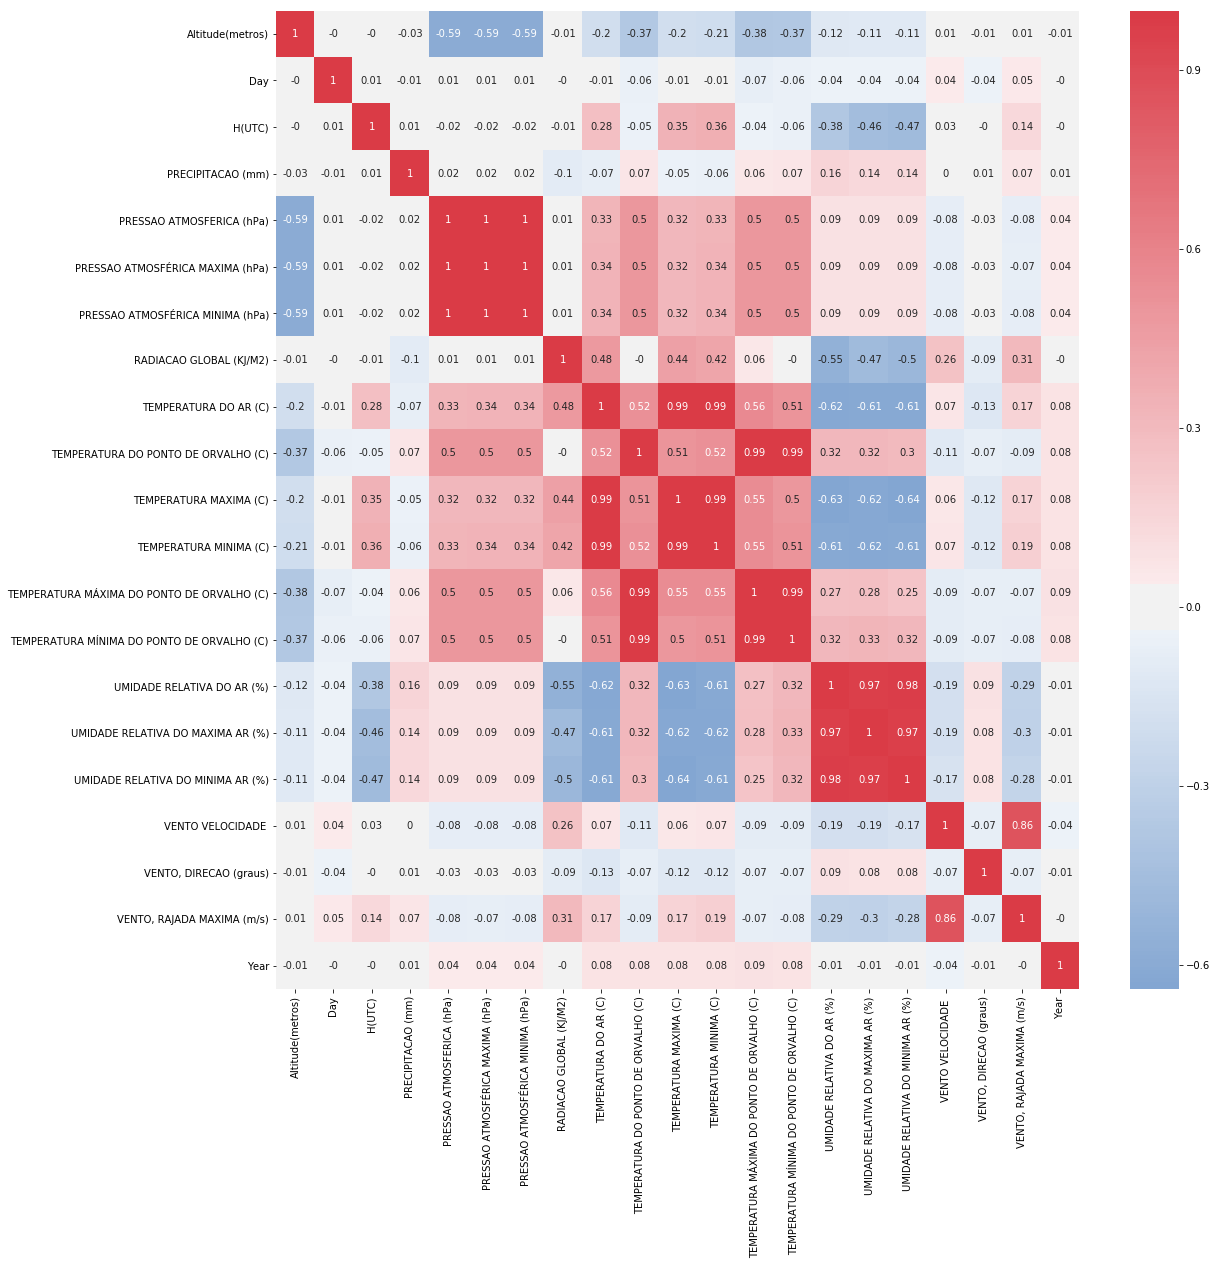

In [14]:
all_columns_num = data.columns.tolist()
all_columns_num.remove('Nome')
all_columns_num.remove('Month')
all_columns_num.remove('Latitude')
all_columns_num.remove('Longitude')
all_columns_num.remove('Codigo OMM')
all_columns_num.remove('Cidade')
all_columns_num.remove('Estado')
all_columns_num.remove('Regiao')
data_clean = data.dropna()
cor_matrix = data_clean[all_columns_num].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

## Fazendo um mapa para verificar como esta cada estação em relação a dados ausentes e a consistencias dos dados

In [15]:
def make_marker(name,lat,long,alt, temp_min,temp_max, temp_min_min,temp_min_max,
                temp_max_min,temp_max_max, prep_min,prep_max, ur_min,ur_max,
                ur_min_min,ur_min_max, ur_max_min,ur_max_max, miss_data_temp_min,
                miss_data_temp_max, miss_data_prep, miss_data_ur_min, miss_data_ur_max,
                miss_data_ur,color):
    return folium.Marker(location=[df_temp['Latitude'].unique()[0],df_temp['Longitude'].unique()[0]], 
                 popup='''
                 Name: {:s}
                 Latitude:{:f}
                 longitude:{:f}
                 Altitude(metros) : {:f}
                 Minimos e Maximos
                 
                 Temperatura do ar: {:f}\t{:f}
                 Temperatura Minima: {:f}\t{:F}
                 Temperatura Maxima:  {:f}\t{:f}
                 Precipitação: {:f}\t{:f}
                 Umidade Relativa: {:f}\t{:f}
                 UR Minima: {:f}\t{:f}
                 UR Maxima: {:f}\t{:f}
                 
                 Dados Ausentes
                 
                 Temperatura Minima: {:f}
                 Temperatura Maxima: {:f}
                 Precipitação: {:f}
                 UR Minima: {:f}
                 UR Maxima: {:f}
                 UR:{:f}
                 '''.format(name,lat,long,alt,
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur), 
                icon=folium.Icon(color=color))

### Problemas procurados

##### - Temperatura minima              > Temperatura Maxima
##### - Temperatura(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Temperatura minima do Ponto de Orvalho              > Temperatura Maxima do Ponto de Orvalho
##### - Temperatura do Ponto de Orvalho(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Umidade Relativa(min,max,do ar) < 0 OU Umidade Relativa(min,max,do ar)   >100
##### - Umidade relativa minima         > Umidade relativa maxima
##### - Dados ausentes > 30

In [16]:
#Grupo de marcadores para possivel problemas
fg_miss_data          =      folium.FeatureGroup(name='Miss Data')
fg_temp_inconsistency =      folium.FeatureGroup(name='Temp correlation Inconsistency')
fg_temp_min           =      folium.FeatureGroup(name='Temp minima Inconsistency')
fg_temp               =      folium.FeatureGroup(name='Temp air Inconsistency')
fg_temp_max           =      folium.FeatureGroup(name='Temp Maxima Inconsistency')
fg_ur_inconsistency   =      folium.FeatureGroup(name='Umildade Relatica Inconsistency')

df_miss_data = pd.DataFrame(columns = ['Estação','Md_temp_max','Md_temp_min','Md_temp','Md_ur_max','Md_ur_min','MD_ur','Md_prec'])

recovery_list = []
danger_list = []
temp_min_list = []
temp_max_list = []
temp_inconsistency_list = []
temp_list = []
ur_list = []

for name in data['Nome'].unique().tolist():
    
    df_temp = data.loc[lambda df: df.Nome == name, :]
    #Maximo e minimos
    temp_min     = df_temp['TEMPERATURA DO AR (C)'].min()
    temp_max     = df_temp['TEMPERATURA DO AR (C)'].max()
    temp_min_min = df_temp['TEMPERATURA MINIMA (C)'].min()
    temp_min_max = df_temp['TEMPERATURA MINIMA (C)'].max()
    temp_max_min = df_temp['TEMPERATURA MAXIMA (C)'].min()
    temp_max_max = df_temp['TEMPERATURA MAXIMA (C)'].max()
    prep_max     = df_temp['PRECIPITACAO (mm)'].max()
    prep_min     = df_temp['PRECIPITACAO (mm)'].min()
    ur_max       = df_temp['UMIDADE RELATIVA DO AR (%)'].max()
    ur_min       = df_temp['UMIDADE RELATIVA DO AR (%)'].min()
    ur_max_max   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].max()
    ur_max_min   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].min()
    ur_min_max   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].max()
    ur_min_min   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].min()
    #Dados ausentes
    miss_data_temp     = (df_temp['TEMPERATURA DO AR (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA DO AR (C)']))*100
    miss_data_temp_min = (df_temp['TEMPERATURA MINIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MINIMA (C)']))*100
    miss_data_temp_max = (df_temp['TEMPERATURA MAXIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MAXIMA (C)']))*100
    miss_data_prep     = (df_temp['PRECIPITACAO (mm)'].isnull().sum()/
                          len(df_temp['PRECIPITACAO (mm)']))*100
    miss_data_ur_min   = (df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MINIMA AR (%)']))*100
    miss_data_ur_max   = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']))*100
    miss_data_ur       = (df_temp['UMIDADE RELATIVA DO AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO AR (%)']))*100
    #Estações com 10% a 50% de dados ausentes poderão ser interpolados
    miss_recovery = (miss_data_temp> 10 and miss_data_temp < 30,
                      miss_data_temp_min> 10 and miss_data_temp_min < 30,
                      miss_data_prep > 10 and miss_data_prep< 30,
                      miss_data_temp_max > 10 and miss_data_temp_max < 30,
                      miss_data_ur > 10 and miss_data_ur < 30,
                      miss_data_ur_max > 10 and miss_data_ur_max < 30,
                      miss_data_ur_min > 10 and miss_data_ur_min < 30)
    #Estações com 50% ou mais de dados ausentes poderam ser eliminadas
    miss_danger = (miss_data_temp > 30,miss_data_temp_min> 30,miss_data_prep> 30,
                   miss_data_temp_max> 30,miss_data_ur> 30,
                   miss_data_ur_max> 30,miss_data_ur_min > 30)
    
    df_miss_data = df_miss_data.append(pd.DataFrame([name,miss_data_temp_max,miss_data_temp_min,miss_data_temp,miss_data_ur_max,
              miss_data_ur_min,miss_data_ur,miss_data_prep], index = df_miss_data.columns.tolist()).T)
    if miss_danger == (1,1,1,1,1,1,1):
        color = 'red'
        danger_list.append(name)
    elif True in miss_recovery:
        color = 'purple'
        recovery_list.append(name)
    else:
        color = 'green'
    fg_miss_data.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
        
    temp_inconsistency = (df_temp['TEMPERATURA MAXIMA (C)'] <= df_temp['TEMPERATURA MINIMA (C)'])
    
    if True in temp_inconsistency:
        color = 'red'
        temp_inconsistency_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_max_min < 0) or (temp_max_max > 45):
        color = 'red'
        temp_max_list.append(name)
    else:
        color = 'green'
    fg_temp_max.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min < 0) or (temp_max > 45):
        color = 'red'
        temp_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min_min < 0) or (temp_min_max > 45):
        color = 'red'
        temp_min_list.append(name)
    else:
        color = 'green'
    
    fg_temp_min.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    ur_min_danger = (ur_min < 0, ur_max_min < 0, ur_min_min < 0 )
    ur_max_danger = (ur_max >100,ur_max_max>100,ur_min_max>100)
    ur_inconsistency = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'] <= df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'])
   
    if (True in ur_min_danger) or (True in ur_max_danger) or (True in ur_inconsistency):
        color = 'red'
        ur_list.append(name)
    else:
        color = 'green'
    fg_ur_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))

map_miss_data          = folium.Map()
map_temp_inconsistency = folium.Map()
map_temp_min           = folium.Map()
map_temp_max           = folium.Map()
map_ur_inconsistency   = folium.Map()
map_miss_data.add_child(fg_miss_data).save(str(path_to_save+month_num+'/map_'+month_num+'_miss_data.html'))
map_temp_inconsistency.add_child(fg_temp_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_temp_incosistency.html')
map_temp_min.add_child(fg_temp_min).save(path_to_save+month_num+'/map_'+month_num+'_temp_min.html')
map_temp_max.add_child(fg_temp_max).save(path_to_save+month_num+'/map_'+month_num+'_temp_max.html')
map_ur_inconsistency.add_child(fg_ur_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_ur_incosistency.html')

df_miss_data = df_miss_data.reset_index(drop=True)
df_miss_data.to_csv(str(path_to_save+month_num+'/'+'Data_miss.csv'))

# Analisando as possiveis incosistencia nos dados 
## Verificando os dados da Umidade relativa

In [17]:
len(ur_list)

1

In [18]:
ur_list

['Parque Estadual Chandless-A102']

In [19]:
df_temp = data.loc[lambda df: df.Nome == ur_list[0], :].reset_index()
errors = df_temp.loc[df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']<=df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'],:]['index'].tolist()
data.iloc[errors][['UMIDADE RELATIVA DO MAXIMA AR (%)','UMIDADE RELATIVA DO MINIMA AR (%)','UMIDADE RELATIVA DO AR (%)']].count()

UMIDADE RELATIVA DO MAXIMA AR (%)    677
UMIDADE RELATIVA DO MINIMA AR (%)    677
UMIDADE RELATIVA DO AR (%)           677
dtype: int64

Como podemos ver os dados de umidade estão todos iguais nestes registros, por isso iremos retila-los

In [20]:
data.loc[errors,'UMIDADE RELATIVA DO MAXIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO MINIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO AR (%)'] = np.nan

## Incosistencia nos dados de temperatura

In [21]:
temp_inconsistency_list

['Parque Estadual Chandless-A102']

### Foi encontrado apenas uma estação com incosistencia de dados de temperatura, vamos ver estes erros

In [22]:
df_temp = data.loc[lambda df: df.Nome == 'Parque Estadual Chandless-A102', :].reset_index()
errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<=df_temp['TEMPERATURA MINIMA (C)'],:]['index'].tolist()
data.iloc[errors].count()

Altitude(metros)                              4
Codigo OMM                                    4
Day                                           4
H(UTC)                                        4
Latitude                                      4
Longitude                                     4
Month                                         4
Nome                                          4
PRECIPITACAO (mm)                             4
PRESSAO ATMOSFERICA (hPa)                     4
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              4
PRESSAO ATMOSFÉRICA MINIMA (hPa)              4
RADIACAO GLOBAL (KJ/M2)                       0
TEMPERATURA DO AR (C)                         4
TEMPERATURA DO PONTO DE ORVALHO (C)           4
TEMPERATURA MAXIMA (C)                        4
TEMPERATURA MINIMA (C)                        4
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)    4
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)    4
UMIDADE RELATIVA DO AR (%)                    2
UMIDADE RELATIVA DO MAXIMA AR (%)       

#### Apenas uma estação foi encontrada com incosistencia na temperatura, e este problema é por causa que os dados de temperatura estão todos iguais

In [23]:
data.loc[errors,'TEMPERATURA DO AR (C)'] = np.nan
data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

## Possiveis erros de temperatura maxima

In [92]:
len(temp_max_list)

67

In [93]:
temp_max_list

['Niquelândia-A004',
 'Rio Brilhante-A743',
 'Amambaí-A750',
 'Santa Maria-A803',
 'Santo Augusto-A805',
 'Uruguaiana-A809',
 'Santa Rosa-A810',
 'Canguçu-A811',
 'Caçapava do Sul-A812',
 'Rio Pardo-A813',
 'Alegrete-A826',
 'Bagé-A827',
 'Erechim-A828',
 'São José dos Ausentes-A829',
 'São Borja-A830',
 'Quaraí-A831',
 'São Gabriel-A832',
 'Santiago-A833',
 'Jaguarão-A836',
 'Soledade-A837',
 'Camaquã-A838',
 'Passo Fundo-A839',
 'Bento Gonçalves-A840',
 'Lagoa Vemelha-A844',
 'São Luiz Gonzaga-A852',
 'Cruz Alta-A853',
 'Frederico Westphalen-A854',
 'Palmeira das Missões-A856',
 'Canela-A879',
 'Vacaria-A880',
 'Dom Pedrito-A881',
 'Ibirubá-A883',
 'Serafina Corrêa-A894',
 'Urussanga-A814',
 'São Joaquim-A815',
 'Novo Horizonte-A816',
 'Joaçaba-A841',
 'Morro da Igreja (Bom Jardim da Serra)-A845',
 'Itapoá-A851',
 'São Miguel do Oeste-A857',
 'Xanxerê-A858',
 'Caçador-A859',
 'Curitibanos-A860',
 'Rio do Campo-A861',
 'Rio Negrinho-A862',
 'Ituporanga-A863',
 'Major Vieira-A864',
 'L

In [94]:
map_temp_max

#### Como temos muitas estações com possiveis registros de baixas temperaturas, vamos olhar o numero de registros que cada uma tem para saber se isso é correcorrente, se isso se repete em outros anos e em qual região do Brasil esta a estação

In [95]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{} Tmin: {} Tmax: {} \nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['TEMPERATURA MINIMA (C)'].min(),df_temp['TEMPERATURA MINIMA (C)'].max(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Niquelândia-A004'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goiás'] Tmin: 7.9 Tmax: 33.0 
Anos: [2001 2002 2003 2004 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]

Estação: ['Rio Brilhante-A743'] Numero de Registross: 22 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul'] Tmin: -1.2 Tmax: 32.4 
Anos: [2008 2009 2010 2011 2012 2013 2014 2015]

Estação: ['Amambaí-A750'] Numero de Registross: 74 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul'] Tmin: -2.0 Tmax: 31.8 
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Santa Maria-A803'] Numero de Registross: 451 Região/Estado: ['Sul']/['Rio Grande do Sul'] Tmin: -1.8 Tmax: 30.1 
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]

Estação: ['Santo Augusto-A805'] Numero de Registross: 234 Região/Estado: ['Sul']/['Rio Grande do Sul'] Tmin: -2.4 Tmax: 27.9 
Anos: [2002 2003 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Urugu

In [ ]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Niquelândia-A004'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goiás']
Anos: [2001 2002 2003 2004 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]

Estação: ['Rio Brilhante-A743'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015]

Estação: ['Amambaí-A750'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Santa Maria-A803'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]



In [33]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','UMIDADE RELATIVA DO AR (%)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  \
471124                     NaN                    -5.9                    NaN   
471146                     NaN                    -8.3                    NaN   
471147                     NaN                    -5.0                    NaN   
471149                     NaN                    -6.9                    NaN   
471150                     NaN                     1.6                    NaN   
471152                     NaN                     2.2                    NaN   
471153                     NaN                     1.8                    NaN   
471154                     NaN                     4.4                    NaN   

        UMIDADE RELATIVA DO AR (%)  Year  Day  H(UTC)              Nome  
471124                        67.0  2007    4       4  Niquelândia-A004  
471146                        69.0  2007    5       2  Niquelândia-A004  
471147                        70.0  2007    5       3  Niquelândia-A004  
471149                        74.0  2007    5       5  Niquelândia-A004  
471150                        77.0  2007    5       6  Niquelândia-A004  
471152                        80.0  2007    5       8  Niquelândia-A004  
471153                        83.0  2007    5       9  Niquelândia-A004  
471154                        81.0  2007    5      10  Niquelândia-A004

In [34]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [35]:
df_temp = data.loc[lambda df: df.Nome == 'Rio Brilhante-A743', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  \
730354                     2.6                     4.1                    2.8   
730374                     3.2                     4.5                    4.2   
730377                     3.2                     4.0                    3.6   
730378                     1.1                     4.1                    1.8   
730379                     0.9                     3.2                    3.2   
731145                     4.4                     4.9                    4.7   
731146                     3.7                     4.9                    3.9   
732367                     4.1                     4.9                    4.2   
732368                     3.2                     4.2                    3.2   
732369                     2.6                     3.4                    2.7   
732370                     0.6                     2.7                    0.6   
732371                    -0.6                     0.9                    0.9   
732386                     0.9                     4.6                    0.9   
732387                     0.1                     1.9                    0.1   
732388                    -0.1                     0.7                    0.2   
732389                    -0.5                     0.3                    0.3   
732390                    -1.0                     0.3                   -0.8   
732391                    -1.1                    -0.3                   -1.1   
732392                    -1.2                     0.2                    0.2   
732393                    -0.7                     0.4                   -0.2   
732394                    -0.2                     1.3                    1.3   
732395                     1.3                     2.8                    2.8   
735538                     3.5                     4.5                    3.9   
735608                     3.7                     4.9                    3.9   
735609                     2.2                     4.4                    2.2   
735610                     2.2                     3.2                    3.1   
735611                     1.8                     3.1                    3.1   
735628                     3.1                     4.3                    3.1   
735629                     2.2                     3.4                    2.5   
735630                     1.8                     2.5                    2.0   
735631                     1.0                     2.3                    1.5   
735632                     1.3                     2.7                    1.3   
735633                     1.0                     1.8                    1.8   
735634                     0.5                     1.8                    0.9   
735635                     0.8                     2.5                    2.5   
735656                     3.1                     4.6                    3.1   
735657                     3.1                     4.1                    3.8   
735658                     2.3                     3.9                    2.6   
735659                     2.6                     4.7                    4.7   

        Year  Day  H(UTC)                Nome  
730354  2009    3      10  Rio Brilhante-A743  
730374  2009    4       6  Rio Brilhante-A743  
730377  2009    4       9  Rio Brilhante-A743  
730378  2009    4      10  Rio Brilhante-A743  
730379  2009    4      11  Rio Brilhante-A743  
731145  2010    6       9  Rio Brilhante-A743  
731146  2010    6      10  Rio Brilhante-A743  
732367  2011   27       7  Rio Brilhante-A743  
732368  2011   27       8  Rio Brilhante-A743  
732369  2011   27       9  Rio Brilhante-A743  
732370  2011   27      10  Rio Brilhante-A743  
732371  2011   27      11  Rio Brilhante-A743  
732386  2011   28       2  Rio Brilhante-A743  
732387  2011   28       3  Rio Brilhante-A743  
732388  2011   28       4  Rio Brilhante-A743  

In [36]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [37]:
df_temp = data.loc[lambda df: df.Nome == 'Amambaí-A750', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  \
742230                     3.9                     4.5                    3.9   
742231                     2.8                     4.1                    2.9   
742232                     2.4                     3.1                    2.7   
742233                     1.7                     2.7                    2.7   
742234                     2.0                     2.8                    2.3   
742235                     1.7                     3.2                    3.2   
742251                     2.9                     4.8                    2.9   
742252                     2.2                     3.5                    3.4   
742253                     2.0                     3.4                    2.2   
742254                     1.2                     2.2                    1.2   
742255                     0.9                     2.0                    0.9   
742256                     0.0                     1.0                    0.7   
742257                    -0.1                     0.7                    0.6   
742258                    -0.5                     0.9                   -0.2   
742259                    -0.3                     2.1                    1.9   
742571                     4.2                     4.7                    4.7   
742642                     3.6                     4.4                    3.6   
742661                     3.6                     4.4                    3.7   
742662                     2.3                     3.7                    2.3   
742663                     2.0                     3.1                    3.1   
742664                     2.1                     3.3                    2.1   
742665                     2.1                     3.7                    3.7   
742666                     2.9                     3.7                    2.9   
742667                     2.4                     3.3                    3.3   
744202                     3.2                     4.9                    3.6   
744203                     3.6                     4.7                    4.7   
744651                     3.2                     4.7                    3.2   
744652                     2.3                     3.2                    2.4   
744653                     1.5                     2.6                    1.6   
744654                     1.1                     2.4                    2.4   
...                        ...                     ...                    ...   
744681                    -1.2                     0.0                   -0.5   
744682                    -1.5                    -0.2                   -1.5   
744683                    -1.5                    -0.2                   -1.0   
744684                    -1.0                     4.1                    4.1   
744914                     4.1                     4.9                    4.4   
744915                     3.6                     4.4                    3.8   
744916                     2.8                     3.8                    2.8   
744917                     2.7                     3.0                    2.7   
744918                     2.0                     2.7                    2.0   
744919                     1.9                     2.2                    1.9   
744920                     1.2                     1.9                    1.2   
744921                     1.2                     1.5                    1.3   
744922                     0.7                     1.3                    0.8   
744923                     0.7                     2.1                    2.1   
747891                     3.8                     4.8                    3.9   
747892                     3.2                     3.9                    3.4   
747893                     3.4                     4.4                    3.9   
747894                     3.2         

In [35]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [38]:
df_temp = data.loc[lambda df: df.Nome == 'Quaraí-A831', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome','Estado','Regiao']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1164387                     3.3                     4.2   
1164388                     2.5                     4.0   
1164389                     2.5                     3.4   
1164390                     1.6                     2.9   
1164391                     1.3                     2.2   
1164393                     1.6                     2.1   
1164394                     1.7                     2.1   
1164395                     1.8                     2.3   
1164396                     2.2                     4.2   
1164417                     4.3                     4.8   
1164418                     4.2                     4.5   
1164419                     4.3                     4.9   
1164607                     4.2                     4.9   
1164608                     3.8                     4.9   
1164609                     3.6                     4.7   
1164610                     3.6                     4.4   
1164611                     2.5                     3.9   
1164627                     3.3                     4.4   
1164628                     3.0                     4.6   
1164630                     2.2                     3.8   
1164631                     1.5                     2.2   
1164632                     1.2                     2.4   
1164633                     0.9                     2.1   
1164634                     0.8                     1.5   
1164635                     1.0                     1.5   
1164653                     3.1                     4.9   
1164654                     3.0                     4.5   
1164655                     3.4                     4.6   
1164656                     2.9                     4.2   
1164657                     2.4                     3.3   
...                         ...                     ...   
1170564                     0.6                     4.3   
1170578                     3.1                     4.9   
1170579                     2.7                     4.4   
1170580                     1.9                     3.3   
1170581                     1.5                     2.4   
1170582                     1.7                     2.3   
1170583                     0.4                     1.7   
1170584                     0.3                     1.9   
1170585                    -0.2                     1.4   
1170586                    -0.6                     1.3   
1170587                    -0.6                     1.3   
1170588                     1.3                     4.9   
1170608                     3.6                     4.4   
1170609                     3.3                     4.3   
1170610                     2.8                     3.8   
1170611                     2.3                     3.3   
1170626                     3.4                     4.4   
1170627                     2.7                     3.6   
1170628                     2.8                     3.6   
1170629                     2.2                     3.0   
1170630                     1.7                     2.9   
1170631                     2.2                     3.0   
1170632                     1.9                     2.4   
1170633                     1.8                     2.3   
1170634                     1.6                     2.1   
1170635                     1.6                     2.9   
1170704                     3.8                     4.5   
1170705                     4.0                     4.3   
1170706                     3.9                     4.6   
1170707                     4.0                     4.6   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)         Nome  \
1164387                    3.4  2008    1       3  Quaraí-A831   
1164388                    2.5  2008    1       4  Quaraí-A831   
1164389                    2.7  2008    1       5  Quaraí-A831   
1164390                    2.1  2008    1       6  Quaraí-A831   
1164391             

In [35]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [39]:
df_temp = data.loc[lambda df: df.Nome == 'São Gabriel-A832', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1170874                     2.4                     4.7   
1170875                     2.4                     3.3   
1171108                     3.7                     4.7   
1171110                     2.9                     4.2   
1171111                     2.9                     3.5   
1171112                     2.4                     3.7   
1171113                     2.1                     3.1   
1171114                     3.0                     3.3   
1171115                     2.8                     3.4   
1171134                     3.5                     4.1   
1171135                     3.8                     4.4   
1171136                     2.9                     4.4   
1171137                     2.7                     3.3   
1171138                     2.2                     3.0   
1171139                     2.2                     3.9   
1171158                     4.3                     4.9   
1171159                     3.2                     4.4   
1171160                     3.0                     4.0   
1171161                     2.1                     3.9   
1171162                     2.1                     3.0   
1171163                     2.3                     3.7   
1171227                     3.2                     3.9   
1171228                     1.7                     4.8   
1171229                     1.5                     3.3   
1171230                     1.5                     2.1   
1171231                     0.4                     2.1   
1171232                     0.8                     2.0   
1171233                     0.3                     1.9   
1171234                    -0.3                     1.0   
1171235                     0.2                     1.2   
...                         ...                     ...   
1176872                    -0.2                     0.9   
1176873                    -0.4                     0.5   
1176876                     0.8                     4.6   
1176889                     3.2                     4.6   
1176890                     2.5                     3.7   
1176891                     2.2                     2.7   
1176892                     1.4                     2.3   
1176895                    -1.0                     0.4   
1176896                    -1.4                     0.8   
1176915                     2.7                     3.8   
1176916                     2.0                     3.0   
1176917                     1.2                     2.6   
1176918                     0.8                     2.3   
1176919                     0.8                     1.5   
1176920                     0.4                     1.6   
1177019                     3.5                     4.3   
1177036                     4.5                     4.9   
1177037                     3.8                     4.6   
1177038                     3.3                     4.6   
1177039                     2.5                     3.6   
1177040                     1.9                     2.5   
1177041                     1.8                     2.4   
1177044                     2.1                     4.8   
1177061                     3.0                     4.9   
1177062                     2.9                     4.4   
1177063                     3.0                     3.7   
1177066                     0.6                     2.0   
1177067                     0.8                     2.1   
1177114                     3.5                     4.0   
1177115                     3.1                     4.3   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)              Nome  
1170874                    2.4  2008    1      10  São Gabriel-A832  
1170875                    3.2  2008    1      11  São Gabriel-A832  
1171108                    4.4  2008   11       4  São Gabriel-A832  
1171110                    2.9  2008   11       6  São Gabriel-A832  


In [40]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Empty DataFrame
Columns: [Nome, TEMPERATURA MINIMA (C), TEMPERATURA MAXIMA (C), TEMPERATURA DO AR (C), Year, Day, H(UTC)]
Index: []

In [41]:
df_temp = data.loc[lambda df: df.Nome == 'Vacaria-A880', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1270947                     3.7                     4.6   
1270948                     2.8                     3.7   
1270949                     2.5                     3.2   
1270950                     2.6                     3.3   
1270951                     2.2                     3.4   
1270952                     1.7                     2.3   
1270953                     1.2                     2.1   
1270954                     1.1                     1.9   
1270955                     1.0                     3.7   
1271166                     2.8                     3.9   
1271167                     2.4                     2.8   
1271168                     2.0                     2.4   
1271169                     1.9                     2.3   
1271170                     2.2                     2.3   
1271171                     2.3                     2.5   
1271172                     2.5                     3.1   
1271173                     3.1                     4.2   
1271182                     3.0                     3.8   
1271183                     2.4                     3.3   
1271184                     1.4                     2.8   
1271185                     0.5                     1.4   
1271186                     0.6                     0.9   
1271187                     0.9                     0.3   
1271188                     1.4                     0.7   
1271189                     2.3                     1.2   
1271190                     2.1                     1.5   
1271191                     2.2                     1.1   
1271192                     3.2                     1.7   
1271193                     2.1                     1.4   
1271194                     2.1                     1.5   
...                         ...                     ...   
1277144                     2.0                     2.9   
1277145                     1.9                     2.6   
1277146                     1.7                     2.4   
1277147                     2.4                     3.2   
1277148                     2.9                     3.8   
1277160                     3.6                     4.1   
1277161                     2.9                     3.7   
1277162                     2.7                     3.1   
1277163                     1.5                     2.7   
1277164                     1.3                     1.9   
1277165                     0.8                     1.4   
1277166                    -0.6                     1.0   
1277167                    -0.4                     0.5   
1277168                     0.0                     0.5   
1277169                     0.2                     0.7   
1277170                    -0.5                     0.7   
1277171                    -0.5                     1.3   
1277172                     0.8                     1.9   
1277173                     1.8                     4.5   
1277184                     3.9                     4.5   
1277185                     2.9                     4.0   
1277186                     3.0                     4.9   
1277188                     4.1                     4.8   
1277190                     1.6                     4.0   
1277191                     1.6                     2.7   
1277192                     0.8                     2.1   
1277193                     0.7                     1.9   
1277194                     1.7                     3.2   
1277195                     2.0                     3.4   
1277261                     4.2                     4.9   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)          Nome  
1270947                    3.7  2008    1       3  Vacaria-A880  
1270948                    2.9  2008    1       4  Vacaria-A880  
1270949                    2.8  2008    1       5  Vacaria-A880  
1270950                    3.1  2008    1       6  Vacaria-A880  
1270951             

In [42]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Empty DataFrame
Columns: [Nome, TEMPERATURA MINIMA (C), TEMPERATURA MAXIMA (C), TEMPERATURA DO AR (C), Year, Day, H(UTC)]
Index: []

In [43]:
df_temp = data.loc[lambda df: df.Nome == 'Rancho Queimado-A870', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1430312                     2.8                     4.0   
1430313                     2.3                     3.4   
1430314                     1.9                     4.0   
1430386                     2.7                     3.8   
1430387                     2.4                     3.9   
1430402                     1.6                     4.0   
1430403                     0.7                     3.5   
1430404                     0.4                     3.8   
1430405                     0.0                     4.9   
1430406                     3.9                     4.9   
1430407                     1.3                     4.7   
1430408                     3.4                     4.1   
1430409                     2.8                     3.8   
1430410                     2.5                     2.8   
1430411                     2.5                     3.3   
1430426                     1.7                     4.3   
1430427                     0.4                     4.4   
1430428                    -0.9                     1.0   
1430429                    -1.3                    -0.3   
1430430                    -1.5                    -0.4   
1430431                    -2.0                    -1.4   
1430432                    -2.2                    -1.3   
1430433                    -2.6                    -1.0   
1430434                    -2.5                    -1.0   
1430435                    -3.3                     1.4   
1430447                     1.6                     3.2   
1430448                     1.0                     1.8   
1430450                     0.8                     3.5   
1430451                     0.0                     1.6   
1430452                    -0.8                     1.1   
...                         ...                     ...   
1430499                    -1.1                     0.4   
1430500                    -1.8                     2.3   
1430501                    -2.2                    -0.2   
1430502                    -1.4                     1.6   
1430503                    -2.4                     1.3   
1430504                    -2.0                     0.0   
1430505                    -2.2                     2.4   
1430506                    -1.6                     1.2   
1430507                    -1.2                     2.9   
1430519                     2.3                     4.3   
1430520                     2.2                     3.4   
1430521                     0.9                     3.6   
1430522                     0.9                     1.7   
1430523                     0.0                     1.0   
1430524                    -0.8                     1.3   
1430525                    -1.3                    -0.1   
1430526                    -1.5                     0.1   
1430527                    -1.5                    -0.4   
1430528                    -1.0                     1.8   
1430529                     0.0                     1.0   
1430530                    -0.1                     0.9   
1430531                     0.5                     2.8   
1430544                     3.4                     4.5   
1430545                     2.9                     3.8   
1430546                     2.5                     3.2   
1430547                     2.5                     3.1   
1430548                     2.7                     4.2   
1430695                     3.0                     4.5   
1430698                     3.4                     4.6   
1430699                     2.9                     4.4   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)                  Nome  
1430312                    2.8  2016    4       8  Rancho Queimado-A870  
1430313                    2.6  2016    4       9  Rancho Queimado-A870  
1430314                    4.0  2016    4      10  Rancho Queimado-A870  
1430386                    2.8  2016    7      10  Ran

In [44]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Empty DataFrame
Columns: [Nome, TEMPERATURA MINIMA (C), TEMPERATURA MAXIMA (C), TEMPERATURA DO AR (C), Year, Day, H(UTC)]
Index: []

In [45]:
df_temp = data.loc[lambda df: df.Nome == 'Ventania-A872', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1559238                     3.8                     4.3   
1559239                     3.9                     4.5   
1559240                     4.4                     4.9   
1559739                     3.5                     4.9   
1559740                     2.2                     3.5   
1559741                     1.2                     2.2   
1559742                     0.5                     1.2   
1559743                     0.0                     0.6   
1559744                    -0.4                     0.0   
1559745                    -0.8                    -0.4   
1559746                    -1.2                    -0.8   
1559747                    -1.3                    -1.1   
1559748                    -1.1                    -0.2   
1559749                    -0.2                     1.7   
1559750                     1.7                     4.2   
1559763                     3.1                     3.6   
1559764                     2.8                     3.2   
1559765                     2.2                     3.0   
1559766                     2.1                     2.7   
1559767                     1.9                     2.6   
1559768                     2.1                     2.9   
1559769                     2.7                     3.7   
1559770                     2.4                     3.5   
1562911                     3.8                     4.7   
1562912                     2.9                     3.9   
1562913                     2.1                     3.0   
1562914                     1.7                     3.1   
1562915                     2.5                     4.0   
1562960                     3.8                     4.5   
1562961                     2.9                     3.9   
1562962                     2.3                     3.1   
1562963                     2.2                     2.6   
1562964                     2.6                     3.7   
1562981                     2.9                     3.9   
1562982                     2.3                     3.4   
1562983                     2.3                     2.8   
1562984                     1.4                     2.5   
1562985                     0.9                     1.8   
1562986                     0.5                     1.9   
1562987                     0.9                     3.1   
1563007                     3.7                     4.4   
1563010                     3.7                     4.8   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)           Nome  
1559238                    4.0  2011    6       6  Ventania-A872  
1559239                    4.4  2011    6       7  Ventania-A872  
1559240                    4.7  2011    6       8  Ventania-A872  
1559739                    3.5  2011   27       3  Ventania-A872  
1559740                    2.2  2011   27       4  Ventania-A872  
1559741                    1.2  2011   27       5  Ventania-A872  
1559742                    0.5  2011   27       6  Ventania-A872  
1559743                    0.0  2011   27       7  Ventania-A872  
1559744                   -0.4  2011   27       8  Ventania-A872  
1559745                   -0.8  2011   27       9  Ventania-A872  
1559746                   -1.2  2011   27      10  Ventania-A872  
1559747                   -1.1  2011   27      11  Ventania-A872  
1559748                   -0.2  2011   27      12  Ventania-A872  
1559749                    1.7  2011   27      13  Ventania-A872  
1559750                    3.9  2011   27      14  Ventania-A872  
1559763                    3.2  2011   28       3  Ventania-A872  
1559764                    2.9  2011   28       4  Ventania-A872  
1559765                    2.2  2011   28       5  Ventania-A872  
1559766                    2.4  2011   28       6  Ventania-A872  
1559767                    2.3  2011   28       7  Ventania-A872  
1559768                    2.9  2011   28       8  Ventania-A872

In [46]:
df_temp = data.loc[lambda df: df.Nome == 'São Luis do Paraitinga-A740', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
2352417                     3.3                     4.0   
2352418                     3.3                     3.7   
2352440                     3.5                     4.4   
2352441                     2.9                     3.5   
2352442                     2.5                     2.9   
2352443                     2.6                     4.4   
2353233                     4.2                     4.9   
2353234                     3.5                     4.4   
2353905                     3.7                     4.3   
2353906                     3.5                     3.9   
2353928                     3.2                     4.2   
2353929                     2.3                     3.9   
2353930                     2.2                     2.6   
2354455                     2.9                     4.9   
2354456                     2.0                     3.8   
2354457                     1.4                     2.1   
2354458                     1.4                     2.0   
2354459                     2.0                     3.1   
2354479                     3.7                     4.6   
2354480                     3.5                     4.1   
2354481                     3.7                     4.5   
2354482                     3.4                     4.2   
2357601                     4.5                     4.8   
2357648                     4.1                     4.8   
2357649                     3.4                     4.2   
2357650                     2.6                     3.7   
2357651                     2.7                     3.8   
2357691                     3.6                     4.8   
2357692                     2.9                     4.2   
2357693                     1.8                     3.0   
2357694                     1.3                     1.9   
2357695                     0.4                     1.4   
2357696                    -0.8                     0.9   
2357697                    -1.7                    -0.8   
2357698                    -1.2                    -0.3   
2357699                    -0.4                     1.9   
2357700                     1.9                     4.5   
2357746                     4.2                     4.8   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)                         Nome  
2352417                    3.3  2009    3       9  São Luis do Paraitinga-A740  
2352418                    3.7  2009    3      10  São Luis do Paraitinga-A740  
2352440                    3.5  2009    4       8  São Luis do Paraitinga-A740  
2352441                    2.9  2009    4       9  São Luis do Paraitinga-A740  
2352442                    2.6  2009    4      10  São Luis do Paraitinga-A740  
2352443                    4.4  2009    4      11  São Luis do Paraitinga-A740  
2353233                    4.2  2010    7       9  São Luis do Paraitinga-A740  
2353234                    3.5  2010    7      10  São Luis do Paraitinga-A740  
2353905                    3.8  2011    5       9  São Luis do Paraitinga-A740  
2353906                    3.9  2011    5      10  São Luis do Paraitinga-A740  
2353928                    3.9  2011    6       8  São Luis do Paraitinga-A740  
2353929                    2.6  2011    6       9  São Luis do Paraitinga-A740  
2353930                    2.5  2011    6      10  São Luis do Paraitinga-A740  
2354455                    3.5  2011   28       7  São Luis do Paraitinga-A740  
2354456                    2.0  2011   28       8  São Luis do Paraitinga-A740  
2354457                    1.5  2011   28       9  São Luis do Paraitinga-A740  
2354458                    2.0  2011   28      10  São Luis do Paraitinga-A740  
2354459                    3.1  2011   28      11  São Luis do Paraitinga-A740  
2354479                    3.8  2011   29       7  São Luis do Paraitinga-A740  
2354480                    3.7  2011   29       8  São Luis do Paraitinga-A740  
235448

In [47]:
for name in ['Niquelândia-A004' ]:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan

## Possiveis erros de temperatura minima

In [30]:
len(temp_min_list)

81

In [31]:
temp_min_list

['Goiânia-A002',
 'Maracaju-A731',
 'Rio Brilhante-A743',
 'Juti-A749',
 'Amambaí-A750',
 'Itaquiraí-A752',
 'Rio Grande-A802',
 'Santa Maria-A803',
 'Santo Augusto-A805',
 'Torres-A808',
 'Uruguaiana-A809',
 'Santa Rosa-A810',
 'Canguçu-A811',
 'Caçapava do Sul-A812',
 'Rio Pardo-A813',
 'Alegrete-A826',
 'Bagé-A827',
 'Erechim-A828',
 'São José dos Ausentes-A829',
 'São Borja-A830',
 'Quaraí-A831',
 'São Gabriel-A832',
 'Santiago-A833',
 'Jaguarão-A836',
 'Soledade-A837',
 'Camaquã-A838',
 'Passo Fundo-A839',
 'Bento Gonçalves-A840',
 'Lagoa Vemelha-A844',
 'São Luiz Gonzaga-A852',
 'Cruz Alta-A853',
 'Frederico Westphalen-A854',
 'Palmeira das Missões-A856',
 'Canela-A879',
 'Vacaria-A880',
 'Dom Pedrito-A881',
 'Ibirubá-A883',
 'São Vicente do Sul-A889',
 'Serafina Corrêa-A894',
 'Santa Vitória do Palmar (Barra do Chuí)-A899',
 'Urussanga-A814',
 'São Joaquim-A815',
 'Novo Horizonte-A816',
 'Joaçaba-A841',
 'Morro da Igreja (Bom Jardim da Serra)-A845',
 'Dionísio Cerqueira-A848',
 

In [32]:
map_temp_min

In [48]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 15 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Maracaju-A731'] Numero de Registross: 76 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Rio Brilhante-A743'] Numero de Registross: 79 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Juti-A749'] Numero de Registross: 47 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Amambaí-A750'] Numero de Registross: 129 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Itaquiraí-A752'] Numero de Registross: 24 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estaç

In [53]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Santo Augusto-A805'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016]

Estação: ['Santa Rosa-A810'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Caçapava do Sul-A812'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Alegrete-A826'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Erechim-A828'] Numero de Registross: 0 Região/Estado: ['Sul']/['Rio Grande do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Esta

In [49]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
448810  Goiânia-A002                    -6.9                    13.2   
448898  Goiânia-A002                    -0.6                    16.4   
448974  Goiânia-A002                    -1.4                    15.0   
449006  Goiânia-A002                    -6.5                    27.2   
449137  Goiânia-A002                     1.3                    16.8   
449506  Goiânia-A002                     4.9                     5.9   
449507  Goiânia-A002                     4.9                     6.9   
449526  Goiânia-A002                     4.6                     5.6   
449527  Goiânia-A002                     4.1                     5.4   
449528  Goiânia-A002                     3.9                     4.8   
449529  Goiânia-A002                     3.1                     4.8   
449530  Goiânia-A002                     3.1                     3.7   
449531  Goiânia-A002                     3.1                     6.9   
451547  Goiânia-A002                     4.7                     7.4   
455184  Goiânia-A002                     4.5                    17.2   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
448810                   13.1  2008    4      10  
448898                   14.9  2008    8       2  
448974                   14.5  2008   11       6  
449006                   27.2  2008   12      14  
449137                   15.5  2008   18       1  
449506                    5.0  2009    3      10  
449507                    6.9  2009    3      11  
449526                    4.7  2009    4       6  
449527                    4.1  2009    4       7  
449528                    4.6  2009    4       8  
449529                    3.1  2009    4       9  
449530                    3.4  2009    4      10  
449531                    6.9  2009    4      11  
451547                    7.2  2011   28      11  
455184                    NaN  2016   30       0

In [54]:
df_temp = data.loc[lambda df: df.Nome == 'Maracaju-A731', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
710400  Maracaju-A731                     4.7                     7.3   
710401  Maracaju-A731                     4.3                     5.6   
710402  Maracaju-A731                     3.5                     4.4   
710403  Maracaju-A731                     2.7                     4.3   
710404  Maracaju-A731                     1.9                     3.4   
710405  Maracaju-A731                     1.5                     2.2   
710406  Maracaju-A731                     1.1                     1.8   
710407  Maracaju-A731                     0.7                     1.2   
710408  Maracaju-A731                     0.7                     1.2   
710409  Maracaju-A731                     0.7                     1.2   
710410  Maracaju-A731                     0.8                     1.3   
710411  Maracaju-A731                     1.2                     2.9   
710412  Maracaju-A731                     2.9                     8.0   
710747  Maracaju-A731                     4.9                     6.7   
710794  Maracaju-A731                     4.3                     5.4   
710795  Maracaju-A731                     4.3                     6.7   
710808  Maracaju-A731                     4.9                     8.1   
710809  Maracaju-A731                     4.9                     5.4   
710810  Maracaju-A731                     3.5                     5.0   
710811  Maracaju-A731                     2.8                     3.7   
710812  Maracaju-A731                     2.3                     3.3   
710813  Maracaju-A731                     1.6                     3.3   
710814  Maracaju-A731                     2.0                     2.6   
710815  Maracaju-A731                     1.5                     2.2   
710816  Maracaju-A731                     0.4                     1.5   
710817  Maracaju-A731                     0.0                     0.7   
710818  Maracaju-A731                    -0.1                     0.3   
710819  Maracaju-A731                     0.1                     1.7   
710820  Maracaju-A731                     1.7                     8.5   
711031  Maracaju-A731                     4.9                     6.5   
...               ...                     ...                     ...   
712824  Maracaju-A731                     3.3                     4.3   
712825  Maracaju-A731                     2.1                     3.3   
712826  Maracaju-A731                     1.2                     2.2   
712827  Maracaju-A731                     1.0                     1.8   
712828  Maracaju-A731                     1.2                     2.4   
712829  Maracaju-A731                     1.8                     3.1   
712830  Maracaju-A731                     0.8                     3.2   
712831  Maracaju-A731                     0.9                     2.0   
712832  Maracaju-A731                     2.0                     3.7   
712833  Maracaju-A731                     3.7                     4.9   
712834  Maracaju-A731                     4.9                     5.5   
715977  Maracaju-A731                     4.9                     5.4   
715978  Maracaju-A731                     4.8                     5.4   
716050  Maracaju-A731                     4.8                     5.5   
716051  Maracaju-A731                     4.9                     5.9   
716069  Maracaju-A731                     3.7                     5.1   
716070  Maracaju-A731                     2.1                     3.7   
716071  Maracaju-A731                     1.7                     2.5   
716072  Maracaju-A731                     1.3                     1.9   
716073  Maracaju-A731                     1.4                     2.2   
716074  Maracaju-A731                     1.2                     2.0   
716075  Maracaju-A731                     1.2                     2.5   
716076  Maracaju-A731                     2.5                     8.6   
71

In [56]:
df_temp = data.loc[lambda df: df.Nome == 'Rio Brilhante-A743', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
730351  Rio Brilhante-A743                     3.5                     6.3   
730352  Rio Brilhante-A743                     3.3                     5.1   
730353  Rio Brilhante-A743                     4.1                     5.0   
730354  Rio Brilhante-A743                     2.6                     4.1   
730355  Rio Brilhante-A743                     2.0                     5.1   
730370  Rio Brilhante-A743                     4.6                     7.1   
730371  Rio Brilhante-A743                     4.6                     6.0   
730372  Rio Brilhante-A743                     3.6                     5.6   
730373  Rio Brilhante-A743                     3.7                     5.0   
730374  Rio Brilhante-A743                     3.2                     4.5   
730375  Rio Brilhante-A743                     4.0                     5.3   
730376  Rio Brilhante-A743                     4.0                     5.5   
730377  Rio Brilhante-A743                     3.2                     4.0   
730378  Rio Brilhante-A743                     1.1                     4.1   
730379  Rio Brilhante-A743                     0.9                     3.2   
730380  Rio Brilhante-A743                     3.2                     9.4   
730592  Rio Brilhante-A743                     4.4                     5.2   
730593  Rio Brilhante-A743                     4.1                     5.2   
730594  Rio Brilhante-A743                     3.3                     5.2   
730595  Rio Brilhante-A743                     4.4                     5.8   
731144  Rio Brilhante-A743                     4.5                     6.4   
731145  Rio Brilhante-A743                     4.4                     4.9   
731146  Rio Brilhante-A743                     3.7                     4.9   
731147  Rio Brilhante-A743                     3.4                     5.6   
731915  Rio Brilhante-A743                     4.8                     8.0   
732366  Rio Brilhante-A743                     4.5                     5.8   
732367  Rio Brilhante-A743                     4.1                     4.9   
732368  Rio Brilhante-A743                     3.2                     4.2   
732369  Rio Brilhante-A743                     2.6                     3.4   
732370  Rio Brilhante-A743                     0.6                     2.7   
...                    ...                     ...                     ...   
735535  Rio Brilhante-A743                     4.1                     5.5   
735536  Rio Brilhante-A743                     4.3                     5.9   
735537  Rio Brilhante-A743                     4.3                     6.2   
735538  Rio Brilhante-A743                     3.5                     4.5   
735539  Rio Brilhante-A743                     3.7                     5.3   
735587  Rio Brilhante-A743                     4.7                     6.8   
735604  Rio Brilhante-A743                     4.3                     5.1   
735605  Rio Brilhante-A743                     4.9                     6.9   
735607  Rio Brilhante-A743                     4.9                     6.1   
735608  Rio Brilhante-A743                     3.7                     4.9   
735609  Rio Brilhante-A743                     2.2                     4.4   
735610  Rio Brilhante-A743                     2.2                     3.2   
735611  Rio Brilhante-A743                     1.8                     3.1   
735612  Rio Brilhante-A743                     3.1                     7.2   
735627  Rio Brilhante-A743                     4.1                     5.9   
735628  Rio Brilhante-A743                     3.1                     4.3   
735629  Rio Brilhante-A743                     2.2                     3.4   
735630  Rio Brilhante-A743                     1.8                     2.5   
735631  Rio Brilhante-A743                     1.0                     2.3   
735632  Rio Brilhante-A743                  

In [58]:
df_temp = data.loc[lambda df: df.Nome == 'Juti-A749' , :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
736423  Juti-A749                     4.7                     5.8   
736424  Juti-A749                     4.4                     5.1   
736425  Juti-A749                     4.7                     5.5   
736426  Juti-A749                     3.2                     4.7   
736427  Juti-A749                     2.9                     6.3   
736450  Juti-A749                     3.4                     5.5   
736451  Juti-A749                     2.9                     6.0   
738436  Juti-A749                     4.9                     5.7   
738437  Juti-A749                     4.0                     4.9   
738438  Juti-A749                     3.4                     4.0   
738439  Juti-A749                     2.8                     3.5   
738440  Juti-A749                     2.0                     2.8   
738441  Juti-A749                     1.6                     2.0   
738442  Juti-A749                     1.6                     2.2   
738443  Juti-A749                     1.9                     2.4   
738444  Juti-A749                     2.4                     4.6   
738445  Juti-A749                     4.5                     7.1   
738459  Juti-A749                     4.7                     5.6   
738460  Juti-A749                     2.4                     4.7   
738461  Juti-A749                     1.7                     2.4   
738462  Juti-A749                     0.9                     1.8   
738463  Juti-A749                     0.9                     1.4   
738464  Juti-A749                     0.6                     1.2   
738465  Juti-A749                     0.0                     1.3   
738466  Juti-A749                    -0.2                     0.0   
738467  Juti-A749                    -0.3                     1.7   
738468  Juti-A749                     1.7                     4.1   
738469  Juti-A749                     3.9                     8.5   
738705  Juti-A749                     4.3                     5.1   
738706  Juti-A749                     3.7                     4.3   
738707  Juti-A749                     3.5                     4.4   
738708  Juti-A749                     4.4                     6.5   
741678  Juti-A749                     4.7                     5.8   
741679  Juti-A749                     3.6                     4.9   
741680  Juti-A749                     3.6                     4.0   
741681  Juti-A749                     2.9                     3.9   
741682  Juti-A749                     2.4                     3.0   
741683  Juti-A749                     2.2                     3.5   
741684  Juti-A749                     3.5                     6.0   
741701  Juti-A749                     4.2                     5.5   
741702  Juti-A749                     3.9                     4.4   
741703  Juti-A749                     3.0                     4.0   
741704  Juti-A749                     2.6                     3.3   
741705  Juti-A749                     2.6                     3.1   
741706  Juti-A749                     2.5                     3.0   
741707  Juti-A749                     2.6                     4.1   
741708  Juti-A749                     4.1                     6.4   

        TEMPERATURA DO AR (C)  Altitude(metros)  UMIDADE RELATIVA DO AR (%)  \
736423                    4.8             375.0                        93.0   
736424                    5.1             375.0                        93.0   
736425                    4.7             375.0                        92.0   
736426                    3.3             375.0                        95.0   
736427                    6.3             375.0                        95.0   
736450                    3.4             375.0                        88.0   
736451                    6.0             375.0                        80.0   
738436                    4.9             375.0                     

In [59]:
df_temp = data.loc[lambda df: df.Nome == 'Amambaí-A750', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
742229  Amambaí-A750                     4.5                     5.8   
742230  Amambaí-A750                     3.9                     4.5   
742231  Amambaí-A750                     2.8                     4.1   
742232  Amambaí-A750                     2.4                     3.1   
742233  Amambaí-A750                     1.7                     2.7   
742234  Amambaí-A750                     2.0                     2.8   
742235  Amambaí-A750                     1.7                     3.2   
742236  Amambaí-A750                     3.1                     6.9   
742249  Amambaí-A750                     4.9                     6.6   
742250  Amambaí-A750                     4.3                     5.8   
742251  Amambaí-A750                     2.9                     4.8   
742252  Amambaí-A750                     2.2                     3.5   
742253  Amambaí-A750                     2.0                     3.4   
742254  Amambaí-A750                     1.2                     2.2   
742255  Amambaí-A750                     0.9                     2.0   
742256  Amambaí-A750                     0.0                     1.0   
742257  Amambaí-A750                    -0.1                     0.7   
742258  Amambaí-A750                    -0.5                     0.9   
742259  Amambaí-A750                    -0.3                     2.1   
742260  Amambaí-A750                     1.7                     5.4   
742569  Amambaí-A750                     4.9                     5.2   
742570  Amambaí-A750                     4.5                     5.0   
742571  Amambaí-A750                     4.2                     4.7   
742572  Amambaí-A750                     4.7                     8.4   
742594  Amambaí-A750                     4.8                     5.6   
742595  Amambaí-A750                     4.6                     6.6   
742638  Amambaí-A750                     4.8                     6.3   
742639  Amambaí-A750                     4.8                     5.7   
742640  Amambaí-A750                     4.4                     5.7   
742641  Amambaí-A750                     3.9                     6.2   
...              ...                     ...                     ...   
747799  Amambaí-A750                     4.9                     5.8   
747800  Amambaí-A750                     4.8                     5.1   
747801  Amambaí-A750                     4.4                     5.2   
747803  Amambaí-A750                     4.6                     6.2   
747826  Amambaí-A750                     4.9                     5.9   
747827  Amambaí-A750                     4.6                     5.9   
747874  Amambaí-A750                     4.6                     5.7   
747875  Amambaí-A750                     4.7                     5.8   
747890  Amambaí-A750                     4.3                     5.8   
747891  Amambaí-A750                     3.8                     4.8   
747892  Amambaí-A750                     3.2                     3.9   
747893  Amambaí-A750                     3.4                     4.4   
747894  Amambaí-A750                     3.2                     3.9   
747895  Amambaí-A750                     2.5                     3.3   
747896  Amambaí-A750                     2.0                     2.6   
747897  Amambaí-A750                     1.3                     2.6   
747898  Amambaí-A750                     0.4                     1.4   
747899  Amambaí-A750                     0.8                     2.1   
747900  Amambaí-A750                     2.1                     5.4   
747915  Amambaí-A750                     4.9                     6.2   
747916  Amambaí-A750                     4.3                     5.9   
747917  Amambaí-A750                     3.5                     4.5   
747918  Amambaí-A750                     2.4                     3.9   
747919  Amambaí-A750                     2.2            

In [60]:
df_temp = data.loc[lambda df: df.Nome == 'Itaquiraí-A752', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
757490  Itaquiraí-A752                     4.7                     6.1   
757491  Itaquiraí-A752                     4.7                     5.0   
757492  Itaquiraí-A752                     4.1                     4.8   
757493  Itaquiraí-A752                     3.7                     4.1   
757494  Itaquiraí-A752                     3.0                     3.7   
757495  Itaquiraí-A752                     2.4                     3.0   
757496  Itaquiraí-A752                     2.2                     2.7   
757497  Itaquiraí-A752                     1.9                     2.3   
757498  Itaquiraí-A752                     1.0                     2.1   
757499  Itaquiraí-A752                     0.8                     2.1   
757500  Itaquiraí-A752                     2.1                     4.9   
757501  Itaquiraí-A752                     4.8                     6.7   
757514  Itaquiraí-A752                     4.1                     5.2   
757515  Itaquiraí-A752                     3.5                     4.9   
757516  Itaquiraí-A752                     3.1                     3.7   
757517  Itaquiraí-A752                     3.4                     4.4   
757518  Itaquiraí-A752                     3.2                     4.4   
757519  Itaquiraí-A752                     2.2                     3.5   
757520  Itaquiraí-A752                     1.7                     2.4   
757521  Itaquiraí-A752                     0.5                     1.7   
757522  Itaquiraí-A752                     0.0                     1.5   
757523  Itaquiraí-A752                    -0.3                     0.9   
757524  Itaquiraí-A752                     0.8                     6.0   
757764  Itaquiraí-A752                     4.6                     7.1   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
757490                    4.8  2011   27       2  
757491                    4.8  2011   27       3  
757492                    4.1  2011   27       4  
757493                    3.7  2011   27       5  
757494                    3.0  2011   27       6  
757495                    2.6  2011   27       7  
757496                    2.2  2011   27       8  
757497                    2.0  2011   27       9  
757498                    1.3  2011   27      10  
757499                    2.1  2011   27      11  
757500                    4.8  2011   27      12  
757501                    5.7  2011   27      13  
757514                    4.8  2011   28       2  
757515                    3.5  2011   28       3  
757516                    3.4  2011   28       4  
757517                    4.2  2011   28       5  
757518                    3.2  2011   28       6  
757519                    2.2  2011   28       7  
757520                    1.7  2011   28       8  
757521                    0.9  2011   28       9  
757522                    0.0  2011   28      10  
757523                    0.9  2011   28      11  
757524                    6.0  2011   28      12  
757764                    7.1  2012    8      12

In [61]:
df_temp = data.loc[lambda df: df.Nome == 'Paranapoema-A850', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1533581  Paranapoema-A850                     5.0                     8.7   
1533582  Paranapoema-A850                     4.5                     5.2   
1533583  Paranapoema-A850                     4.5                     5.9   
1533584  Paranapoema-A850                     4.3                     5.9   
1535981  Paranapoema-A850                     4.7                     5.7   
1535982  Paranapoema-A850                     4.2                     4.9   
1535983  Paranapoema-A850                     3.0                     4.6   
1535984  Paranapoema-A850                     2.7                     3.3   
1535985  Paranapoema-A850                     2.5                     3.4   
1535986  Paranapoema-A850                     2.0                     2.6   
1535987  Paranapoema-A850                     2.0                     4.9   
1535988  Paranapoema-A850                     4.5                     6.7   
1536001  Paranapoema-A850                     4.1                     5.5   
1536002  Paranapoema-A850                     3.2                     4.6   
1536003  Paranapoema-A850                     2.5                     3.7   
1536004  Paranapoema-A850                     2.9                     5.0   
1536005  Paranapoema-A850                     2.5                     5.4   
1536006  Paranapoema-A850                     1.6                     3.6   
1536007  Paranapoema-A850                     1.1                     4.1   
1536008  Paranapoema-A850                     0.4                     1.6   
1536009  Paranapoema-A850                     0.6                     1.1   
1536010  Paranapoema-A850                    -0.5                     1.3   
1536011  Paranapoema-A850                    -0.7                     1.7   
1536012  Paranapoema-A850                     1.7                     6.1   
1539221  Paranapoema-A850                     4.2                     6.0   
1539222  Paranapoema-A850                     4.3                     5.8   
1539223  Paranapoema-A850                     2.6                     5.3   
1539224  Paranapoema-A850                     3.2                     4.6   
1539225  Paranapoema-A850                     2.2                     5.4   
1539226  Paranapoema-A850                     2.9                     3.8   
1539227  Paranapoema-A850                     2.3                     6.0   
1539246  Paranapoema-A850                     4.9                     5.5   
1539247  Paranapoema-A850                     3.9                     5.2   
1539248  Paranapoema-A850                     3.7                     5.8   
1539249  Paranapoema-A850                     3.8                     5.9   
1539250  Paranapoema-A850                     3.7                     5.8   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
1533581                    5.0  2008   17       5  
1533582                    5.2  2008   17       6  
1533583                    4.5  2008   17       7  
1533584                    5.5  2008   17       8  
1535981                    4.8  2011   27       5  
1535982                    4.3  2011   27       6  
1535983                    3.0  2011   27       7  
1535984                    3.3  2011   27       8  
1535985                    2.6  2011   27       9  
1535986                    2.2  2011   27      10  
1535987                    4.9  2011   27      11  
1535988                    6.7  2011   27      12  
1536001                    4.3  2011   28       1  
1536002                    3.2  2011   28       2  
1536003                    3.0  2011   28       3  
1536004                    5.0  2011   28       4  
1536005                    2.9  2011   28       5  
1536006                    2.7  2011   28       6  
1536007                    1.2  2011   28       7  
1536008                    1.0  2011   28       8  
1536009                    0.9  2011   28       9  
1536010                   -

In [63]:
df_temp = data.loc[lambda df: df.Nome == 'Sorocaba-A713', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
2234288  Sorocaba-A713                     4.7                     8.1   
2234289  Sorocaba-A713                     4.3                     5.5   
2234290  Sorocaba-A713                     3.8                     4.9   
2234291  Sorocaba-A713                     4.4                     7.3   
2234310  Sorocaba-A713                     4.8                     5.9   
2234312  Sorocaba-A713                     4.7                     5.6   
2234313  Sorocaba-A713                     4.5                     5.6   
2234314  Sorocaba-A713                     4.0                     5.3   
2234315  Sorocaba-A713                     4.6                     6.5   
2234338  Sorocaba-A713                     4.5                     5.9   
2234339  Sorocaba-A713                     4.4                     6.8   
2235317  Sorocaba-A713                     5.0                     5.4   
2235318  Sorocaba-A713                     4.8                     5.4   
2235319  Sorocaba-A713                     4.7                     5.1   
2235320  Sorocaba-A713                     4.5                     5.3   
2235321  Sorocaba-A713                     4.5                     5.1   
2235322  Sorocaba-A713                     4.8                     5.2   
2235323  Sorocaba-A713                     4.7                     8.4   
2235344  Sorocaba-A713                     3.6                     5.9   
2235345  Sorocaba-A713                     3.4                     4.4   
2235346  Sorocaba-A713                     2.8                     3.6   
2235347  Sorocaba-A713                     2.9                     4.7   
2235348  Sorocaba-A713                     4.7                     9.0   
2235701  Sorocaba-A713                     4.5                     6.3   
2235702  Sorocaba-A713                     4.4                     5.1   
2235703  Sorocaba-A713                     4.1                     4.8   
2235704  Sorocaba-A713                     3.3                     5.4   
2235705  Sorocaba-A713                     3.5                     4.5   
2235706  Sorocaba-A713                     3.1                     6.1   
2236518  Sorocaba-A713                     4.9                     7.4   
...                ...                     ...                     ...   
2237746  Sorocaba-A713                    -0.1                     1.7   
2237747  Sorocaba-A713                     0.8                     3.1   
2237748  Sorocaba-A713                     3.0                     7.2   
2237767  Sorocaba-A713                     4.5                     6.1   
2237768  Sorocaba-A713                     3.2                     7.0   
2237769  Sorocaba-A713                     3.2                     7.1   
2237770  Sorocaba-A713                     4.5                     6.6   
2237771  Sorocaba-A713                     4.5                     6.7   
2240891  Sorocaba-A713                     5.0                     6.9   
2240912  Sorocaba-A713                     4.5                     5.9   
2240913  Sorocaba-A713                     4.8                     6.0   
2240914  Sorocaba-A713                     4.4                     6.1   
2240915  Sorocaba-A713                     4.1                     5.9   
2240937  Sorocaba-A713                     4.5                     5.4   
2240938  Sorocaba-A713                     3.6                     5.0   
2240939  Sorocaba-A713                     3.8                     6.6   
2240960  Sorocaba-A713                     4.0                     6.0   
2240961  Sorocaba-A713                     2.2                     4.0   
2240962  Sorocaba-A713                     1.5                     2.4   
2240963  Sorocaba-A713                     1.8                     3.3   
2240964  Sorocaba-A713                     3.0                     8.2   
2240979  Sorocaba-A713                     5.0                     7.1   
2240980  Sorocaba-A713

In [64]:
df_temp = data.loc[lambda df: df.Nome == 'Valparaiso-A734', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
2313464  Valparaiso-A734                     4.5                     5.3   
2313465  Valparaiso-A734                     3.7                     5.0   
2313467  Valparaiso-A734                     4.1                     6.1   
2313485  Valparaiso-A734                     5.0                     5.9   
2313486  Valparaiso-A734                     4.2                     6.1   
2313487  Valparaiso-A734                     4.0                     4.4   
2313488  Valparaiso-A734                     3.6                     4.5   
2313489  Valparaiso-A734                     3.7                     4.5   
2313491  Valparaiso-A734                     3.6                     6.9   
2315481  Valparaiso-A734                     4.8                     5.9   
2315482  Valparaiso-A734                     4.1                     5.2   
2315483  Valparaiso-A734                     4.1                     5.6   
2315497  Valparaiso-A734                     3.6                     5.6   
2315498  Valparaiso-A734                     3.6                     4.2   
2315499  Valparaiso-A734                     2.6                     4.2   
2315500  Valparaiso-A734                     1.8                     2.6   
2315501  Valparaiso-A734                     1.3                     2.2   
2315502  Valparaiso-A734                     1.0                     4.2   
2315503  Valparaiso-A734                     0.5                     2.2   
2315504  Valparaiso-A734                     0.2                     1.1   
2315505  Valparaiso-A734                     0.0                     0.7   
2315506  Valparaiso-A734                    -0.2                     0.4   
2315507  Valparaiso-A734                    -0.1                     2.9   
2315508  Valparaiso-A734                     2.9                     8.2   
2318718  Valparaiso-A734                     4.9                     6.4   
2318719  Valparaiso-A734                     4.6                     5.1   
2318720  Valparaiso-A734                     4.0                     4.7   
2318721  Valparaiso-A734                     3.7                     4.2   
2318722  Valparaiso-A734                     3.3                     3.9   
2318723  Valparaiso-A734                     3.3                     7.4   
2318739  Valparaiso-A734                     5.0                     5.9   
2318740  Valparaiso-A734                     4.7                     5.5   
2318741  Valparaiso-A734                     4.3                     5.6   
2318742  Valparaiso-A734                     4.4                     5.0   
2318743  Valparaiso-A734                     5.0                     6.6   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
2313464                    5.0  2009    3       8  
2313465                    3.7  2009    3       9  
2313467                    6.1  2009    3      11  
2313485                    5.0  2009    4       5  
2313486                    4.4  2009    4       6  
2313487                    4.1  2009    4       7  
2313488                    4.5  2009    4       8  
2313489                    4.2  2009    4       9  
2313491                    6.8  2009    4      11  
2315481                    5.1  2011   27       9  
2315482                    4.1  2011   27      10  
2315483                    5.6  2011   27      11  
2315497                    3.9  2011   28       1  
2315498                    3.7  2011   28       2  
2315499                    2.6  2011   28       3  
2315500                    1.9  2011   28       4  
2315501                    1.8  2011   28       5  
2315502                    1.3  2011   28       6  
2315503                    1.0  2011   28       7  
2315504                    0.2  2011   28       8  
2315505                    0.4  2011   28       9  
2315506                    0.0  2011   28      10  
2315507                    2.9  2011   28      11  
2315508                    8.1  201

In [65]:
df_temp = data.loc[lambda df: df.Nome == 'São Luis do Paraitinga-A740', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  \
2352415  São Luis do Paraitinga-A740                     5.0   
2352416  São Luis do Paraitinga-A740                     4.0   
2352417  São Luis do Paraitinga-A740                     3.3   
2352418  São Luis do Paraitinga-A740                     3.3   
2352419  São Luis do Paraitinga-A740                     3.7   
2352439  São Luis do Paraitinga-A740                     4.4   
2352440  São Luis do Paraitinga-A740                     3.5   
2352441  São Luis do Paraitinga-A740                     2.9   
2352442  São Luis do Paraitinga-A740                     2.5   
2352443  São Luis do Paraitinga-A740                     2.6   
2352444  São Luis do Paraitinga-A740                     4.4   
2353231  São Luis do Paraitinga-A740                     4.9   
2353232  São Luis do Paraitinga-A740                     4.8   
2353233  São Luis do Paraitinga-A740                     4.2   
2353234  São Luis do Paraitinga-A740                     3.5   
2353235  São Luis do Paraitinga-A740                     3.4   
2353256  São Luis do Paraitinga-A740                     4.9   
2353257  São Luis do Paraitinga-A740                     4.4   
2353258  São Luis do Paraitinga-A740                     4.0   
2353376  São Luis do Paraitinga-A740                     4.1   
2353377  São Luis do Paraitinga-A740                     4.1   
2353378  São Luis do Paraitinga-A740                     3.9   
2353424  São Luis do Paraitinga-A740                     4.8   
2353425  São Luis do Paraitinga-A740                     5.0   
2353903  São Luis do Paraitinga-A740                     4.9   
2353904  São Luis do Paraitinga-A740                     4.3   
2353905  São Luis do Paraitinga-A740                     3.7   
2353906  São Luis do Paraitinga-A740                     3.5   
2353907  São Luis do Paraitinga-A740                     3.9   
2353927  São Luis do Paraitinga-A740                     3.4   
...                              ...                     ...   
2357602  São Luis do Paraitinga-A740                     4.6   
2357647  São Luis do Paraitinga-A740                     4.5   
2357648  São Luis do Paraitinga-A740                     4.1   
2357649  São Luis do Paraitinga-A740                     3.4   
2357650  São Luis do Paraitinga-A740                     2.6   
2357651  São Luis do Paraitinga-A740                     2.7   
2357652  São Luis do Paraitinga-A740                     3.8   
2357669  São Luis do Paraitinga-A740                     3.9   
2357670  São Luis do Paraitinga-A740                     4.3   
2357689  São Luis do Paraitinga-A740                     4.4   
2357690  São Luis do Paraitinga-A740                     4.3   
2357691  São Luis do Paraitinga-A740                     3.6   
2357692  São Luis do Paraitinga-A740                     2.9   
2357693  São Luis do Paraitinga-A740                     1.8   
2357694  São Luis do Paraitinga-A740                     1.3   
2357695  São Luis do Paraitinga-A740                     0.4   
2357696  São Luis do Paraitinga-A740                    -0.8   
2357697  São Luis do Paraitinga-A740                    -1.7   
2357698  São Luis do Paraitinga-A740                    -1.2   
2357699  São Luis do Paraitinga-A740                    -0.4   
2357700  São Luis do Paraitinga-A740                     1.9   
2357701  São Luis do Paraitinga-A740                     4.2   
2357719  São Luis do Paraitinga-A740                     4.9   
2357720  São Luis do Paraitinga-A740                     3.3   
2357721  São Luis do Paraitinga-A740                     3.7   
2357722  São Luis do Paraitinga-A740                     3.5   
2357723  São Luis do Paraitinga-A740                     3.9   
2357745  São Luis do Paraitinga-A740                     4.5   
2357746  São Luis do Paraitinga-A740                     4.2   
2357747  São Luis do Paraitinga-A740                     4.0   

         TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  Year  D

In [66]:
df_temp = data.loc[lambda df: df.Nome == 'Barra do Turvo-A746', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
2365446  Barra do Turvo-A746                     4.7                     5.6   
2365447  Barra do Turvo-A746                     4.2                     5.4   
2365448  Barra do Turvo-A746                     3.9                     4.9   
2365449  Barra do Turvo-A746                     3.7                     4.6   
2365450  Barra do Turvo-A746                     3.5                     4.7   
2365451  Barra do Turvo-A746                     3.5                     6.0   
2365466  Barra do Turvo-A746                     5.0                     5.5   
2365467  Barra do Turvo-A746                     4.4                     5.0   
2365468  Barra do Turvo-A746                     3.9                     4.4   
2365469  Barra do Turvo-A746                     3.6                     4.0   
2365470  Barra do Turvo-A746                     3.0                     3.6   
2365471  Barra do Turvo-A746                     2.9                     3.5   
2365472  Barra do Turvo-A746                     2.7                     3.6   
2365473  Barra do Turvo-A746                     2.5                     3.1   
2365474  Barra do Turvo-A746                     2.5                     2.7   
2365475  Barra do Turvo-A746                     2.5                     4.5   
2365476  Barra do Turvo-A746                     4.4                    11.7   
2365491  Barra do Turvo-A746                     4.8                     5.3   
2365492  Barra do Turvo-A746                     4.4                     5.0   
2365493  Barra do Turvo-A746                     3.8                     4.4   
2365494  Barra do Turvo-A746                     3.5                     3.9   
2365495  Barra do Turvo-A746                     3.2                     3.6   
2365496  Barra do Turvo-A746                     3.0                     3.4   
2365497  Barra do Turvo-A746                     2.5                     3.0   
2365498  Barra do Turvo-A746                     2.1                     2.6   
2365499  Barra do Turvo-A746                     2.1                     4.6   
2365500  Barra do Turvo-A746                     4.6                    10.8   
2366073  Barra do Turvo-A746                     4.9                     5.5   
2366074  Barra do Turvo-A746                     4.4                     5.0   
2366075  Barra do Turvo-A746                     4.6                     6.3   
...                      ...                     ...                     ...   
2369915  Barra do Turvo-A746                    -2.9                     0.9   
2369916  Barra do Turvo-A746                     0.9                     6.4   
2369925  Barra do Turvo-A746                     4.4                     7.7   
2369926  Barra do Turvo-A746                     2.4                     4.4   
2369927  Barra do Turvo-A746                     0.9                     2.4   
2369928  Barra do Turvo-A746                     0.2                     1.1   
2369929  Barra do Turvo-A746                    -0.5                     0.3   
2369930  Barra do Turvo-A746                    -1.1                    -0.5   
2369931  Barra do Turvo-A746                    -1.7                    -1.1   
2369932  Barra do Turvo-A746                    -2.2                    -1.6   
2369933  Barra do Turvo-A746                    -2.6                    -2.0   
2369934  Barra do Turvo-A746                    -2.8                    -2.5   
2369935  Barra do Turvo-A746                    -3.3                    -2.6   
2369936  Barra do Turvo-A746                    -3.5                    -2.9   
2369937  Barra do Turvo-A746                    -3.6                    -3.1   
2369938  Barra do Turvo-A746                    -3.6                    -3.2   
2369939  Barra do Turvo-A746                    -3.6                    -0.9   
2369940  Barra do Turvo-A746                    -0.9                     6.0   
2369960  Barra do Turvo-

Mesmo caso do atribulto anterior, e as cidades encontradas nao tem registros de temperatura encontradas tão baixas

In [68]:
for name in ['Goiânia-A002','Paranapoema-A850','Itaquiraí-A752']:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

In [67]:
for name in ['Goiânia-A002','Paranapoema-A850','Itaquiraí-A752']:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

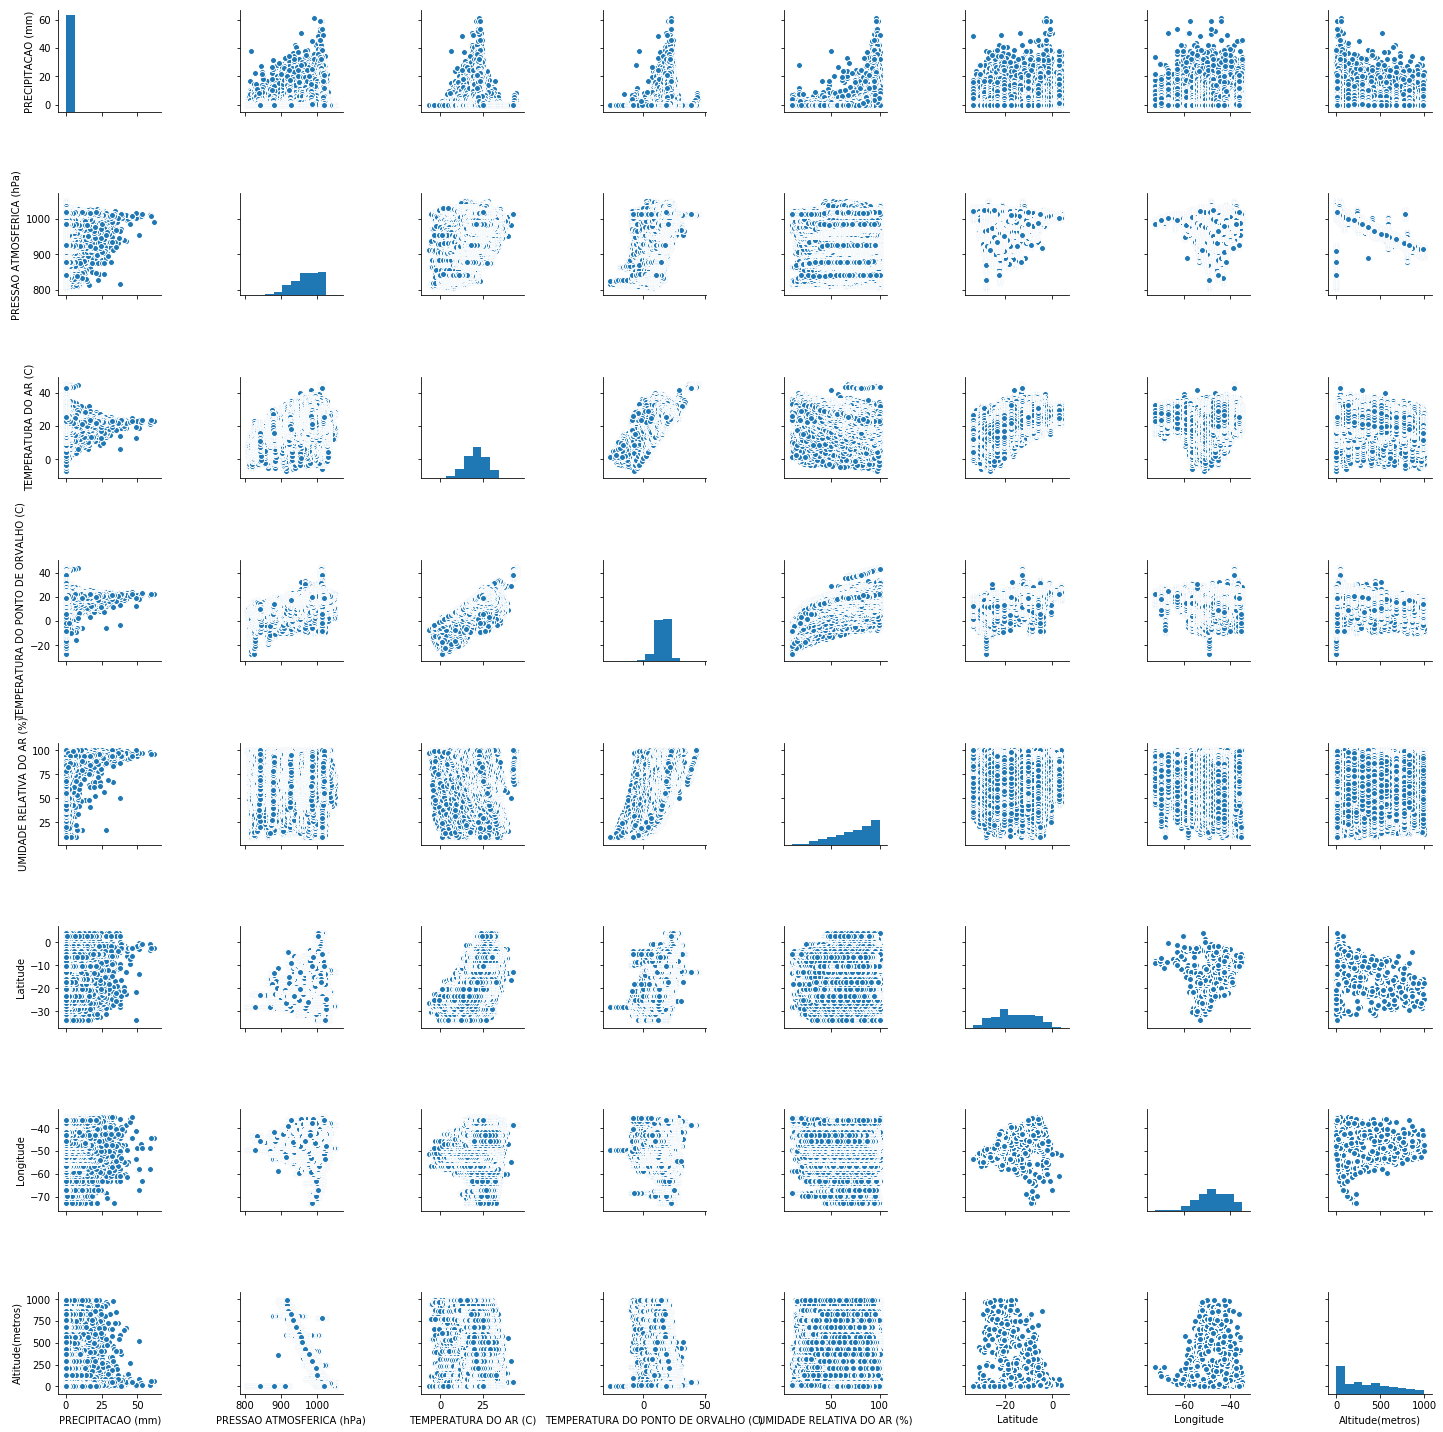

In [69]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

#### Como podemos ver existe alguns dados fora do padrão dos demais registro, como os dados de Pressão atmosferica que podemos perceber que sua relação com Altidude não esta muito correta. iremos retirar este dados também

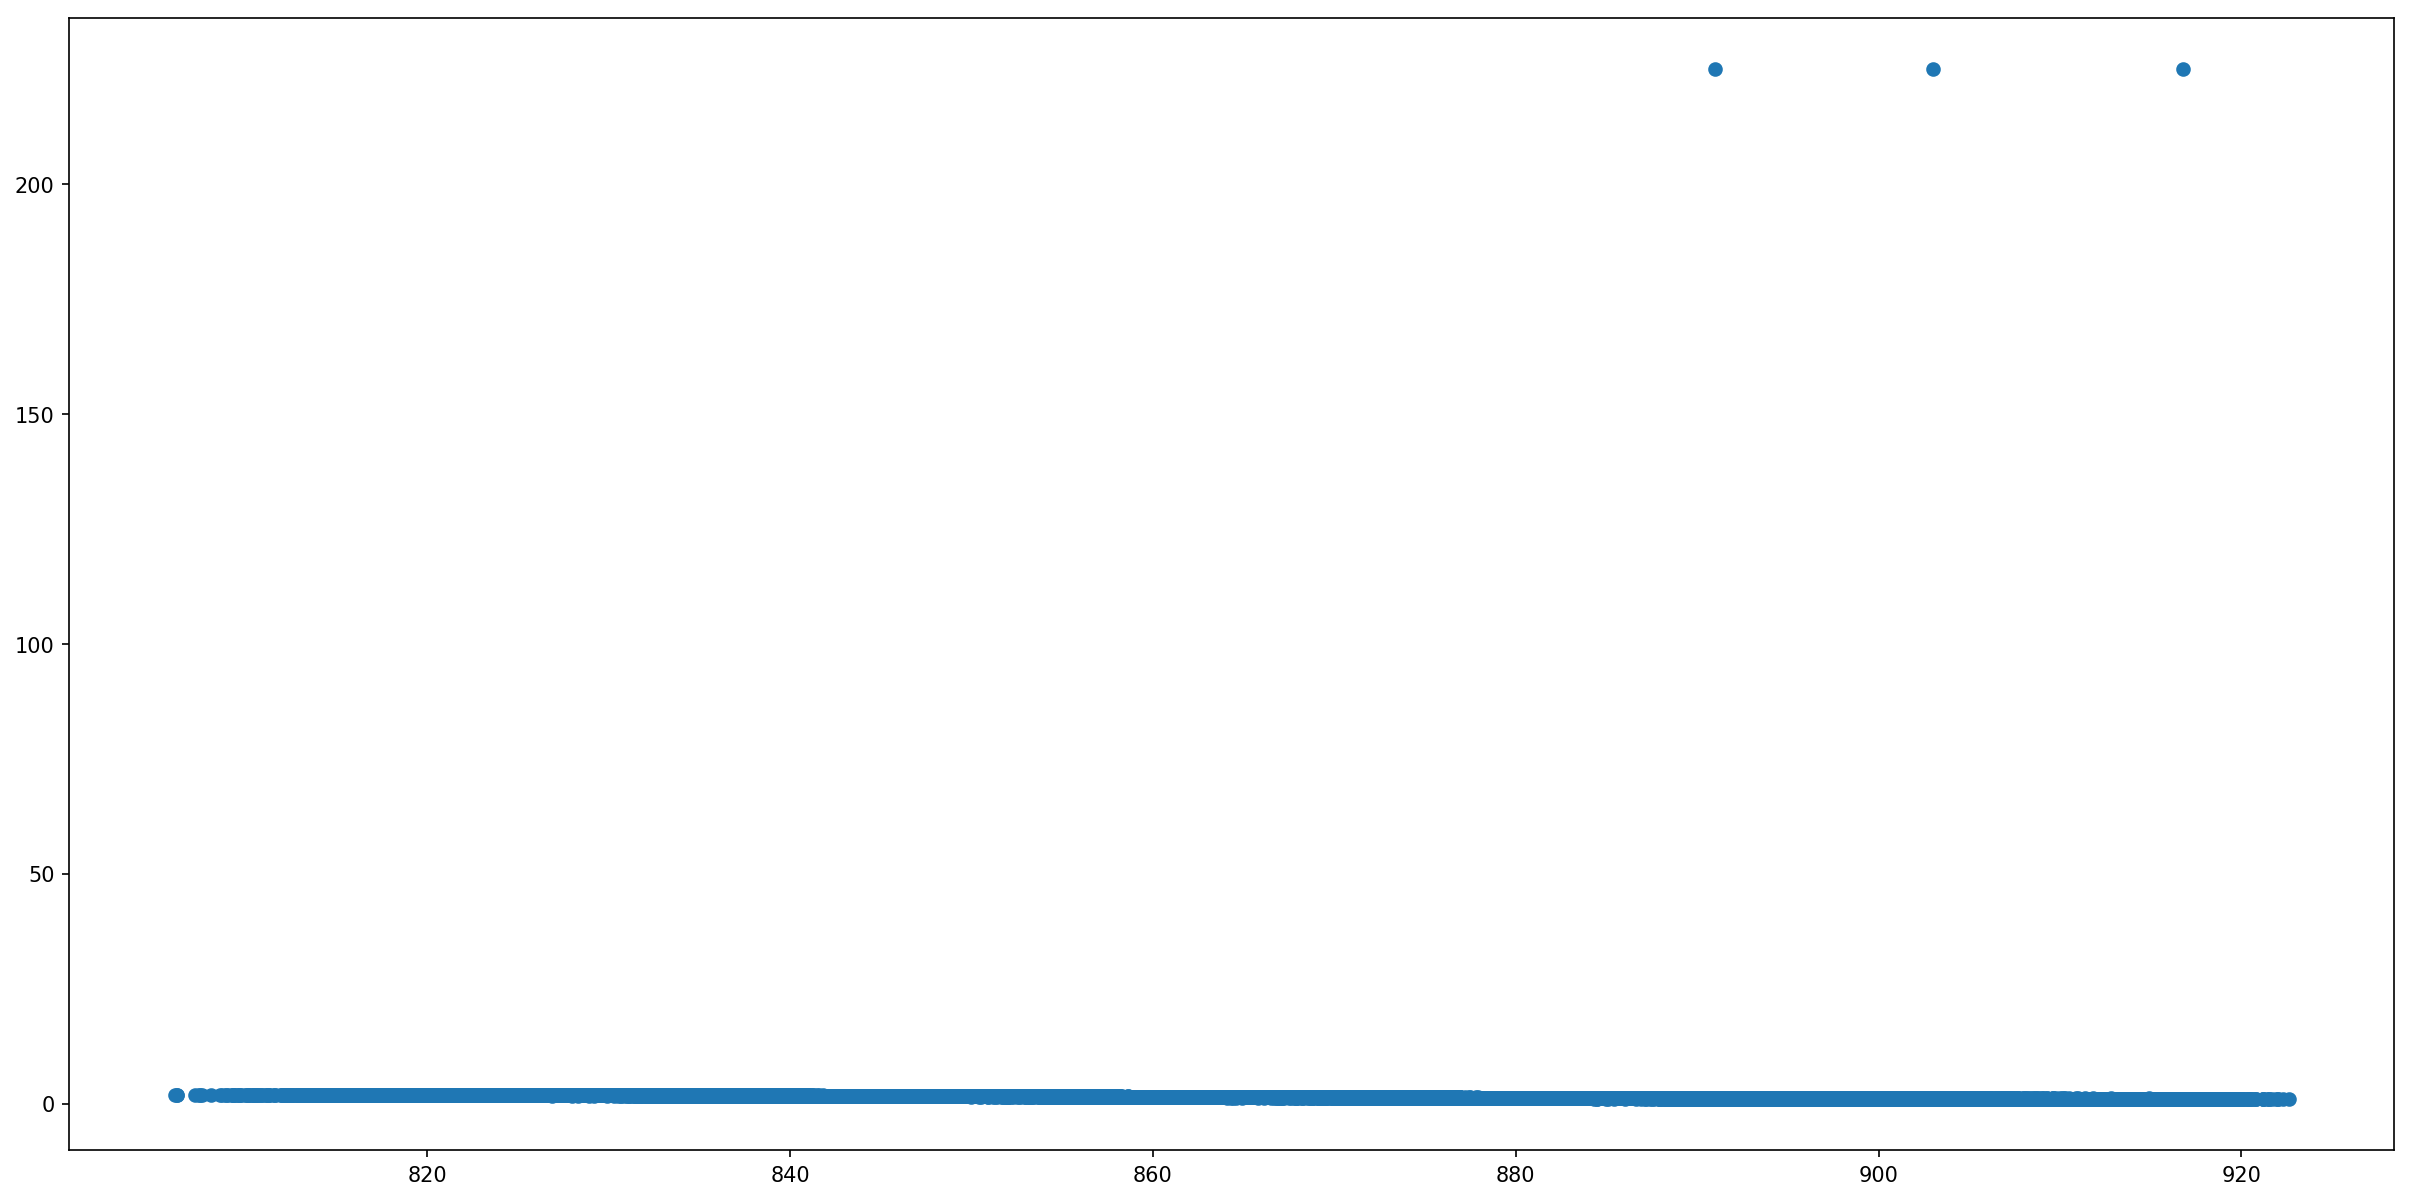

In [72]:
plt.figure(figsize=(20, 10), dpi=150)
plt.scatter(data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:]['PRESSAO ATMOSFERICA (hPa)'],
           data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:]['Altitude(metros)'])


In [73]:
data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:].head(10)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
417768             1.161     86715.0    1       0 -15.789343 -47.925756   
417769             1.161     86715.0    1       1 -15.789343 -47.925756   
417770             1.161     86715.0    1       2 -15.789343 -47.925756   
417771             1.161     86715.0    1       3 -15.789343 -47.925756   
417772             1.161     86715.0    1       4 -15.789343 -47.925756   
417773             1.161     86715.0    1       5 -15.789343 -47.925756   
417774             1.161     86715.0    1       6 -15.789343 -47.925756   
417775             1.161     86715.0    1       7 -15.789343 -47.925756   
417776             1.161     86715.0    1       8 -15.789343 -47.925756   
417777             1.161     86715.0    1       9 -15.789343 -47.925756   

        Month           Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
417768      6  Brasília-A001                0.0                      886.8   
417769      6  Brasília-A001                0.0                      887.4   
417770      6  Brasília-A001                0.0                      887.3   
417771      6  Brasília-A001                0.0                      887.3   
417772      6  Brasília-A001                0.0                      887.0   
417773      6  Brasília-A001                0.0                      887.0   
417774      6  Brasília-A001                0.0                      886.9   
417775      6  Brasília-A001                0.0                      886.7   
417776      6  Brasília-A001                0.0                      887.0   
417777      6  Brasília-A001                0.0                      887.2   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
417768                             886.8                             886.4   
417769                             887.4                             886.8   
417770                             887.5                             887.3   
417771                             887.3                             887.2   
417772                             887.3                             887.0   
417773                             887.1                             887.0   
417774                             887.1                             886.9   
417775                             886.9                             886.6   
417776                             887.0                             886.6   
417777                             887.3                             887.0   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
417768                      NaN                   20.4   
417769                      NaN                   19.3   
417770                      NaN                   20.7   
417771                      NaN                   19.7   
417772                      NaN                   19.0   
417773                      NaN                   17.6   
417774                      NaN                   17.6   
417775                      NaN                   16.9   
417776                      NaN                   15.7   
417777                      NaN                   16.9   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
417768                                 11.5                    21.1   
417769                                 11.7                    20.8   
417770                                 11.8                    20.7   
417771                                 11.8                    20.7   
417772                                 11.8                    19.7   
417773                                 12.0                    19.0   
417774                                 11.9                    18.4   
417775                                 11.5                    17.6   
417776                                 11.5                    16.9   
417777                                 11.5                    17.1   

        TEMPERATURA MINIMA (C)  TEMPERATURA

In [74]:
errors = data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:].index.tolist()
print('Numero de resgitros que serão retirados: {}'.format(len(errors)))
data.loc[errors,'PRESSAO ATMOSFERICA (hPa)'] = np.nan

Numero de resgitros que serão retirados: 181639


In [75]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.125150
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                             11.400363
PRESSAO ATMOSFERICA (hPa)                     14.520392
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               9.031417
PRESSAO ATMOSFÉRICA MINIMA (hPa)               9.030532
RADIACAO GLOBAL (KJ/M2)                       55.855521
TEMPERATURA DO AR (C)                          8.657186
TEMPERATURA DO PONTO DE ORVALHO (C)            9.801163
TEMPERATURA MAXIMA (C)                         8.659291
TEMPERATURA MINIMA (C)                         8.661822
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     9

## Retirando os dados ausentes

### por trabalhamos com medias não iremos fazer recuperação dos dados ausentes apenas discarta-los.
### mas primeiro iremos descarta o atribulto de radiação global, que ja ele esta ausente em 50% da base

In [76]:
data.drop(columns=['RADIACAO GLOBAL (KJ/M2)','VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)'],inplace=True)

In [77]:
data.dropna(inplace=True)

In [78]:
data.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv')

In [79]:
data.describe().T

count          mean  \
Altitude(metros)                            2665045.0    375.978092   
Codigo OMM                                  2665045.0  85310.517284   
Day                                         2665045.0     15.516327   
H(UTC)                                      2665045.0     11.565693   
Latitude                                    2665045.0    -15.676487   
Longitude                                   2665045.0    -47.543794   
Month                                       2665045.0      6.000000   
PRECIPITACAO (mm)                           2665045.0      0.091993   
PRESSAO ATMOSFERICA (hPa)                   2665045.0    973.582017   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2665045.0    973.835954   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2665045.0    973.332146   
TEMPERATURA DO AR (C)                       2665045.0     21.347438   
TEMPERATURA DO PONTO DE ORVALHO (C)         2665045.0     15.810384   
TEMPERATURA MAXIMA (C)                      2665045.0     21.992270   
TEMPERATURA MINIMA (C)                      2665045.0     20.728042   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2665045.0     16.307393   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2665045.0     15.332295   
UMIDADE RELATIVA DO AR (%)                  2665045.0     73.926481   
UMIDADE RELATIVA DO MAXIMA AR (%)           2665045.0     76.591570   
UMIDADE RELATIVA DO MINIMA AR (%)           2665045.0     71.197781   
Year                                        2665045.0   2011.521679   

                                                    std           min  \
Altitude(metros)                             285.075210      2.000000   
Codigo OMM                                  2277.532787  81609.000000   
Day                                            8.658506      1.000000   
H(UTC)                                         6.928918      0.000000   
Latitude                                       8.175743    -33.742297   
Longitude                                      6.822585    -72.786778   
Month                                          0.000000      6.000000   
PRECIPITACAO (mm)                              0.790898      0.000000   
PRESSAO ATMOSFERICA (hPa)                     31.413172    877.300000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              31.426744    877.900000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              31.401476    877.200000   
TEMPERATURA DO AR (C)                          6.076603     -5.800000   
TEMPERATURA DO PONTO DE ORVALHO (C)            4.862662    -10.900000   
TEMPERATURA MAXIMA (C)                         6.176315     -5.500000   
TEMPERATURA MINIMA (C)                         5.970299     -6.300000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     4.822045     -9.700000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     4.917375    -11.800000   
UMIDADE RELATIVA DO AR (%)                    19.033004     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             18.107079     10.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             19.756925     10.000000   
Year                                           3.111842   2000.000000   

                                                     25%           50%  \
Altitude(metros)                              112.000000    340.000000   
Codigo OMM                                  81965.000000  86721.000000   
Day                                             8.000000     16.000000   
H(UTC)                                          6.000000     12.000000   
Latitude                                      -22.119867    -15.751536   
Longitude                                     -52.381980    -47.947967   
Month                                           6.000000      6.000000   
PRECIPITACAO (mm)                               0.000000      0.000000   
PRESSAO ATMOSFERICA (hPa)                     950.700000    976.600000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              951.000000    976.900000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              950.500000    976.

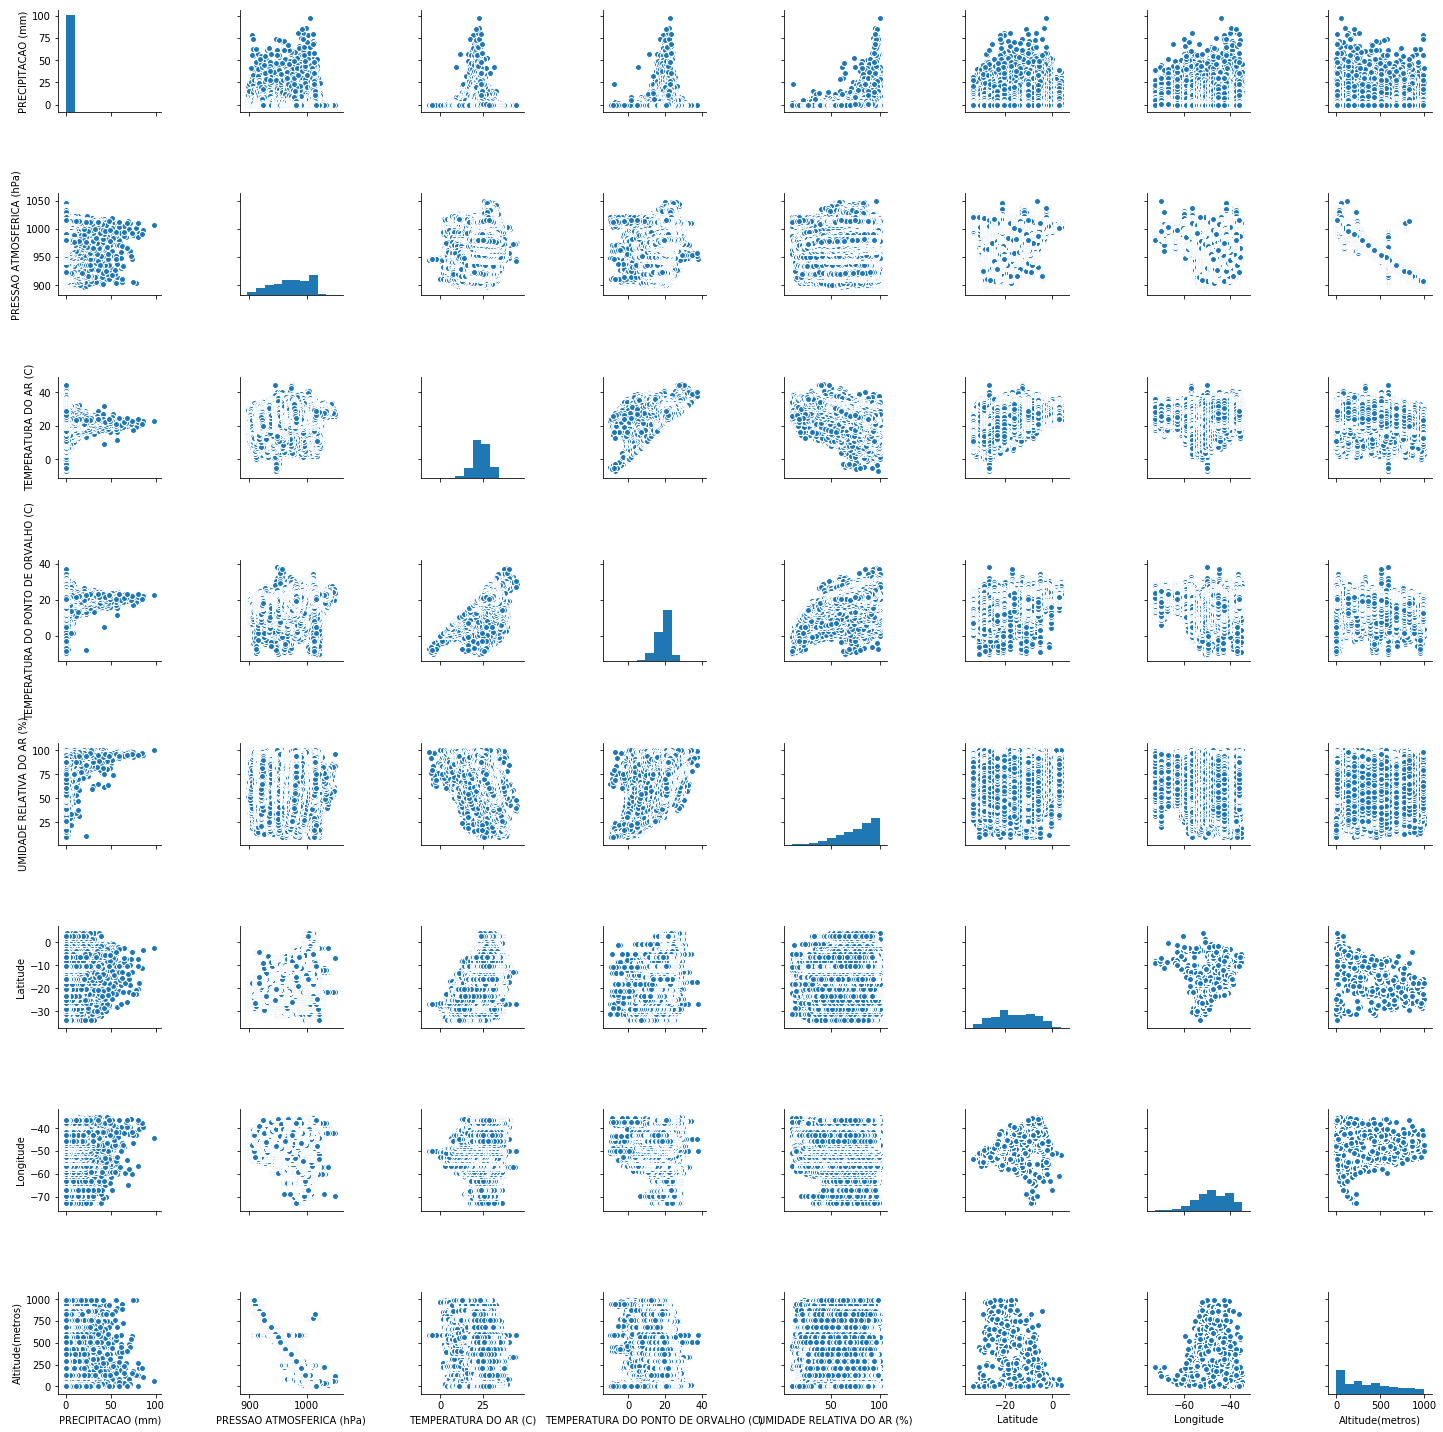

In [67]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

### Fazendo a base de dados com as medias mensais de cada estação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
month_num = str(6)
data = pd.read_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv').drop(columns=['Unnamed: 0'])
data.head(6)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      6   
1             185.0     81963.0    1       2 -9.358353 -69.926257      6   
2             185.0     81963.0    1      13 -9.358353 -69.926257      6   
3             185.0     81963.0    1      14 -9.358353 -69.926257      6   
4             185.0     81963.0    1      18 -9.358353 -69.926257      6   
5             185.0     81963.0    1      19 -9.358353 -69.926257      6   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102               14.2   
3  Parque Estadual Chandless-A102               17.2   
4  Parque Estadual Chandless-A102                0.6   
5  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)   ...    TEMPERATURA MINIMA (C)  \
0                      990.4   ...                      23.9   
1                      991.6   ...                      23.2   
2                      995.1   ...                      21.8   
3                      995.9   ...                      21.3   
4                      993.3   ...                      20.8   
5                      992.7   ...                      21.3   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        23.4   
1                                        22.8   
2                                        22.9   
3                                        21.0   
4                                        20.8   
5                                        20.9   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        23.1                        95.0   
1                                        22.4                        96.0   
2                                        21.1                        96.0   
3                                        20.7                        96.0   
4                                        19.9                        93.0   
5                                        19.7                        93.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  Year  \
0                               95.0                               94.0  2009   
1                               96.0                               95.0  2009   
2                               96.0                               95.0  2009   
3                               96.0                               95.0  2009   
4                               96.0                               92.0  2009   
5                               94.0                               89.0  2009   

                      Cidade  Estado  Regiao  
0  Parque Estadual Chandless    Acre   Norte  
1  Parque Estadual Chandless    Acre   Norte  
2  Parque Estadual Chandless    Acre   Norte  
3  Parque Estadual Chandless    Acre   Norte  
4  Parque Estadual Chandless    Acre   Norte  
5  Parque Estadual Chandless    Acre   Norte  

[6 rows x 25 columns]

In [2]:
data_mean = data.groupby(['Nome']).agg('mean')
data_mean.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_mean.csv')
data_mean.head(5)

Altitude(metros)  Codigo OMM        Day     H(UTC)  \
Nome                                                                      
Abrolhos-A422                    21.0     86765.0  17.680785  11.534998   
Acaraú-A360                      67.0     81755.0  15.496700  11.497569   
Afonso Cláudio-A657             507.0     86827.0  15.422634  11.535805   
Aimorés-A534                    288.0     86803.0  15.460201  11.622983   
Alegre-A617                     129.0     86828.0  15.547231  11.522258   

                      Latitude  Longitude  Month  PRECIPITACAO (mm)  \
Nome                                                                  
Abrolhos-A422       -17.963016 -38.703288    6.0           0.089523   
Acaraú-A360          -3.121067 -40.087288    6.0           0.063043   
Afonso Cláudio-A657 -20.104194 -41.106861    6.0           0.020388   
Aimorés-A534        -19.532768 -41.090801    6.0           0.027716   
Alegre-A617         -20.750412 -41.488852    6.0           0.030340   

                     PRESSAO ATMOSFERICA (hPa)  \
Nome                                             
Abrolhos-A422                      1016.526304   
Acaraú-A360                        1005.592706   
Afonso Cláudio-A657                 960.605111   
Aimorés-A534                        990.326461   
Alegre-A617                        1003.828370   

                     PRESSAO ATMOSFÉRICA MAXIMA (hPa)     ...       \
Nome                                                      ...        
Abrolhos-A422                             1016.741685     ...        
Acaraú-A360                               1005.832876     ...        
Afonso Cláudio-A657                        960.825133     ...        
Aimorés-A534                               990.560774     ...        
Alegre-A617                               1004.072468     ...        

                     TEMPERATURA DO AR (C)  \
Nome                                         
Abrolhos-A422                    24.733304   
Acaraú-A360                      26.347794   
Afonso Cláudio-A657              19.807975   
Aimorés-A534                     21.923646   
Alegre-A617                      20.770188   

                     TEMPERATURA DO PONTO DE ORVALHO (C)  \
Nome                                                       
Abrolhos-A422                                  20.034730   
Acaraú-A360                                    21.787478   
Afonso Cláudio-A657                            15.018506   
Aimorés-A534                                   15.880853   
Alegre-A617                                    16.026927   

                     TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
Nome                                                                  
Abrolhos-A422                     25.084307               24.388943   
Acaraú-A360                       26.939093               25.786888   
Afonso Cláudio-A657               20.472480               19.174951   
Aimorés-A534                      22.570993               21.326354   
Alegre-A617                       21.417310               20.152195   

                     TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         20.468703   
Acaraú-A360                                           22.237791   
Afonso Cláudio-A657                                   15.472732   
Aimorés-A534                                          16.342990   
Alegre-A617                                           16.508159   

                     TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         19.587873   
Acaraú-A360                                           21.361375   
Afonso Cláudio-A657                                   14.570233   
Aimorés-A534                                          15.441897   
Alegre-A617                              

In [3]:
data_mean['Precipitação Acum.(mm)'] = data.groupby(['Nome','Year']).agg('sum').groupby('Nome').agg('mean')['PRECIPITACAO (mm)']

data_mean.to_csv('./Tempo-Clima/Dados/Brasil_6_mean.csv')

In [4]:
data_mean.describe().T

count          mean          std  \
Altitude(metros)                            467.0    367.693790   282.317818   
Codigo OMM                                  467.0  85230.062099  2312.154651   
Day                                         467.0     15.568692     0.741648   
H(UTC)                                      467.0     11.568056     0.130018   
Latitude                                    467.0    -15.366610     8.230777   
Longitude                                   467.0    -47.955419     7.218061   
Month                                       467.0      6.000000     0.000000   
PRECIPITACAO (mm)                           467.0      0.092087     0.090984   
PRESSAO ATMOSFERICA (hPa)                   467.0    974.401556    30.842412   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            467.0    974.654954    30.853832   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            467.0    974.151261    30.833433   
TEMPERATURA DO AR (C)                       467.0     21.482987     4.440954   
TEMPERATURA DO PONTO DE ORVALHO (C)         467.0     15.968079     3.966267   
TEMPERATURA MAXIMA (C)                      467.0     22.130199     4.477436   
TEMPERATURA MINIMA (C)                      467.0     20.861073     4.412019   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  467.0     16.468531     3.967428   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  467.0     15.487018     3.973838   
UMIDADE RELATIVA DO AR (%)                  467.0     74.058412     9.237306   
UMIDADE RELATIVA DO MAXIMA AR (%)           467.0     76.736389     8.935864   
UMIDADE RELATIVA DO MINIMA AR (%)           467.0     71.318639     9.486202   
Year                                        467.0   2011.914577     1.376556   
Precipitação Acum.(mm)                      467.0     61.857170    61.747505   

                                                     min           25%  \
Altitude(metros)                                2.000000    112.000000   
Codigo OMM                                  81609.000000  81952.500000   
Day                                            13.869565     15.427756   
H(UTC)                                         11.231362     11.496405   
Latitude                                      -33.742297    -21.818064   
Longitude                                     -72.786778    -52.882993   
Month                                           6.000000      6.000000   
PRECIPITACAO (mm)                               0.000000      0.020936   
PRESSAO ATMOSFERICA (hPa)                     906.991212    953.436232   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              907.195698    953.680282   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              906.784466    953.176252   
TEMPERATURA DO AR (C)                           9.339231     18.562987   
TEMPERATURA DO PONTO DE ORVALHO (C)             6.266615     12.948326   
TEMPERATURA MAXIMA (C)                         10.022923     19.186487   
TEMPERATURA MINIMA (C)                          8.686923     17.942731   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)      6.847385     13.469907   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)      5.659538     12.470172   
UMIDADE RELATIVA DO AR (%)                     46.450065     67.698712   
UMIDADE RELATIVA DO MAXIMA AR (%)              49.169909     70.838276   
UMIDADE RELATIVA DO MINIMA AR (%)              43.901859     64.347844   
Year                                         2008.334310   2011.422952   
Precipitação Acum.(mm)                          0.000000     14.440000   

                                                     50%           75%  \
Altitude(metros)                              327.000000    562.000000   
Codigo OMM                                  86709.000000  86853.500000   
Day                                            15.501777     15.626502   
H(UTC)                                         11.517130     11.595407   
Latitude                                      -15.280215     -8.632726   
Longitude                                     -48.177259

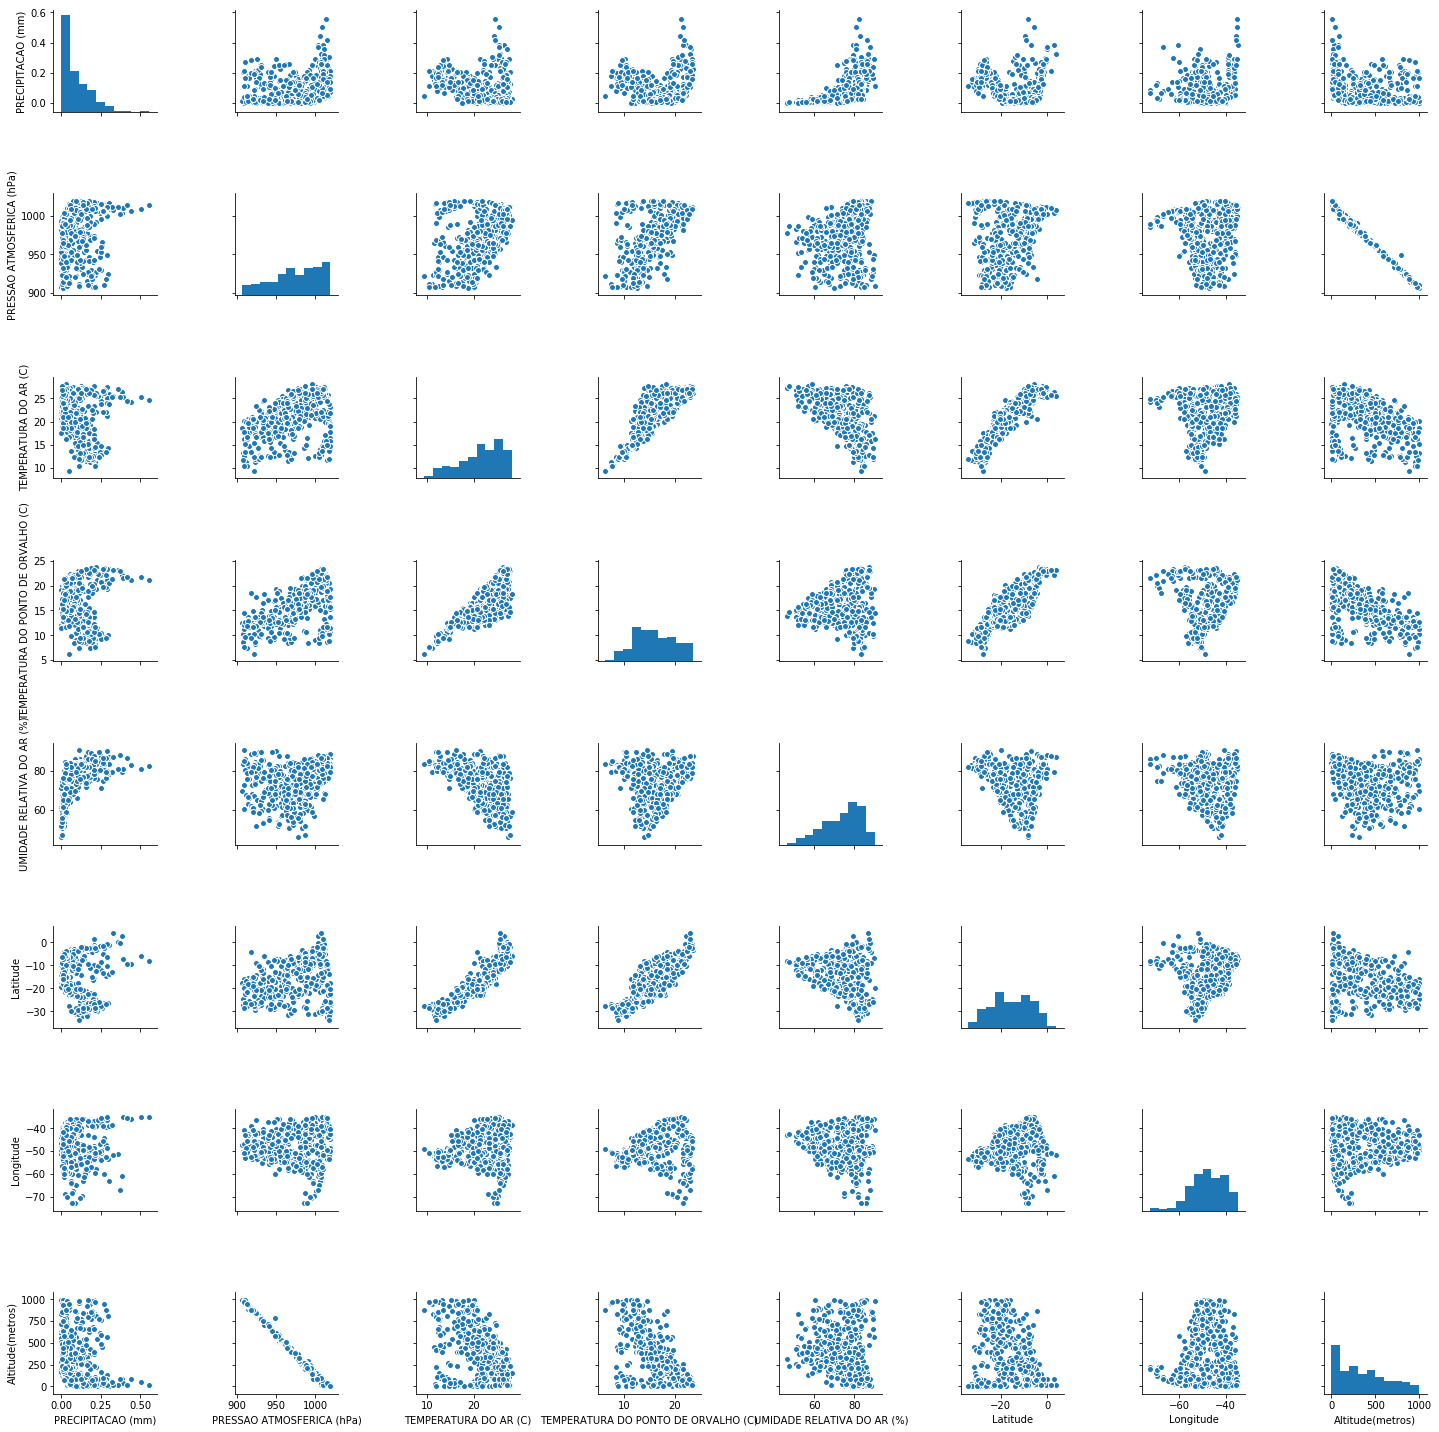

In [82]:
sns.pairplot(data_mean[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [86]:
target_wanderlay = ['UMIDADE RELATIVA DO AR (%)']
features_UR_wanderlay = data_mean.columns.tolist()
features_UR_wanderlay.remove('Day')
features_UR_wanderlay.remove('Month')
features_UR_wanderlay.remove('Codigo OMM')
features_UR_wanderlay.remove('Year')
features_UR_wanderlay.remove('H(UTC)')
#features_UR_wanderlay.remove('VENTO VELOCIDADE ')
#features_UR_wanderlay.remove('VENTO, DIRECAO (graus)')
#features_UR_wanderlay.remove('VENTO, RAJADA MAXIMA (m/s)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_UR_wanderlay.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO AR (C)')
#features_UR_wanderlay.remove('TEMPERATURA MAXIMA (C)')
#features_UR_wanderlay.remove('TEMPERATURA MINIMA (C)')
features_UR_wanderlay.remove('PRECIPITACAO (mm)')
features_UR_wanderlay.remove('PRESSAO ATMOSFERICA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')




features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

In [92]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)


In [93]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))

Variance: 0.8512049207874164
Erro absoluto medio: 2.0673445746620054
Erro quadrado medio: 6.366416512560287
Erro absoluto mediano: 1.752770501680203
R2 Score: 0.845191635656429


In [94]:
errors=abs(scaler_y.inverse_transform(y_test).ravel()-scaler_y.inverse_transform([y_pred,]))
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(UR_true - UR_pred)
MIN: 0.09175741388577308 	MAX: 6.254493155829223 	MEAN: 2.0673445746620054	Std: 1.4465486242003274


In [99]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform(y_test).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
20  52.405233  52.405233
38  54.998961  54.998961
31  59.713085  59.713085
18  60.070148  60.070148
90  61.813641  61.813641

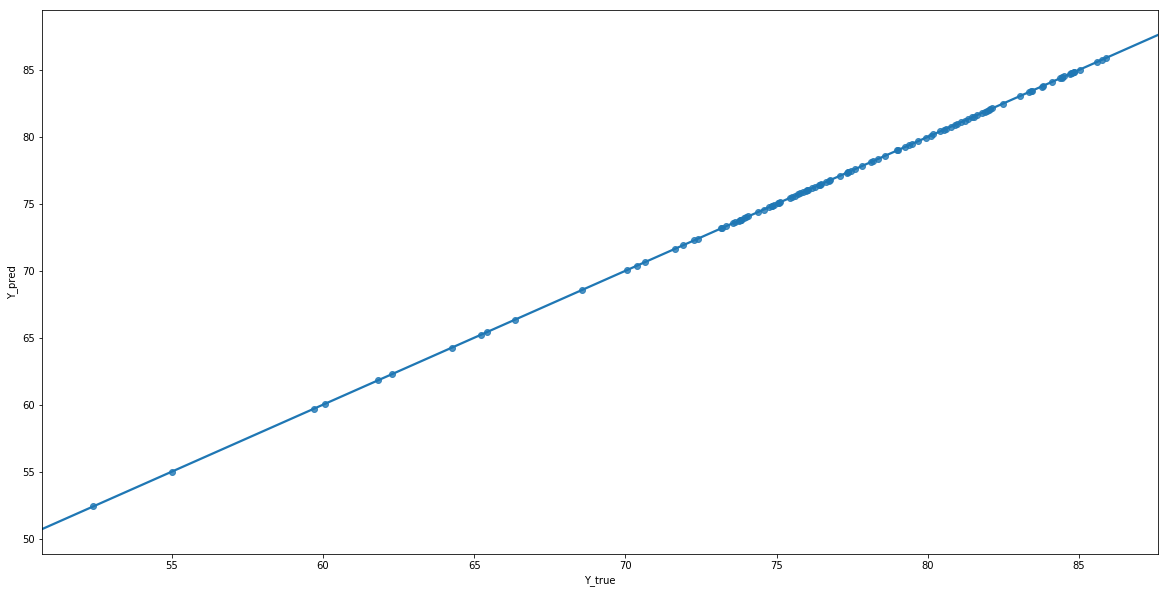

In [96]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)

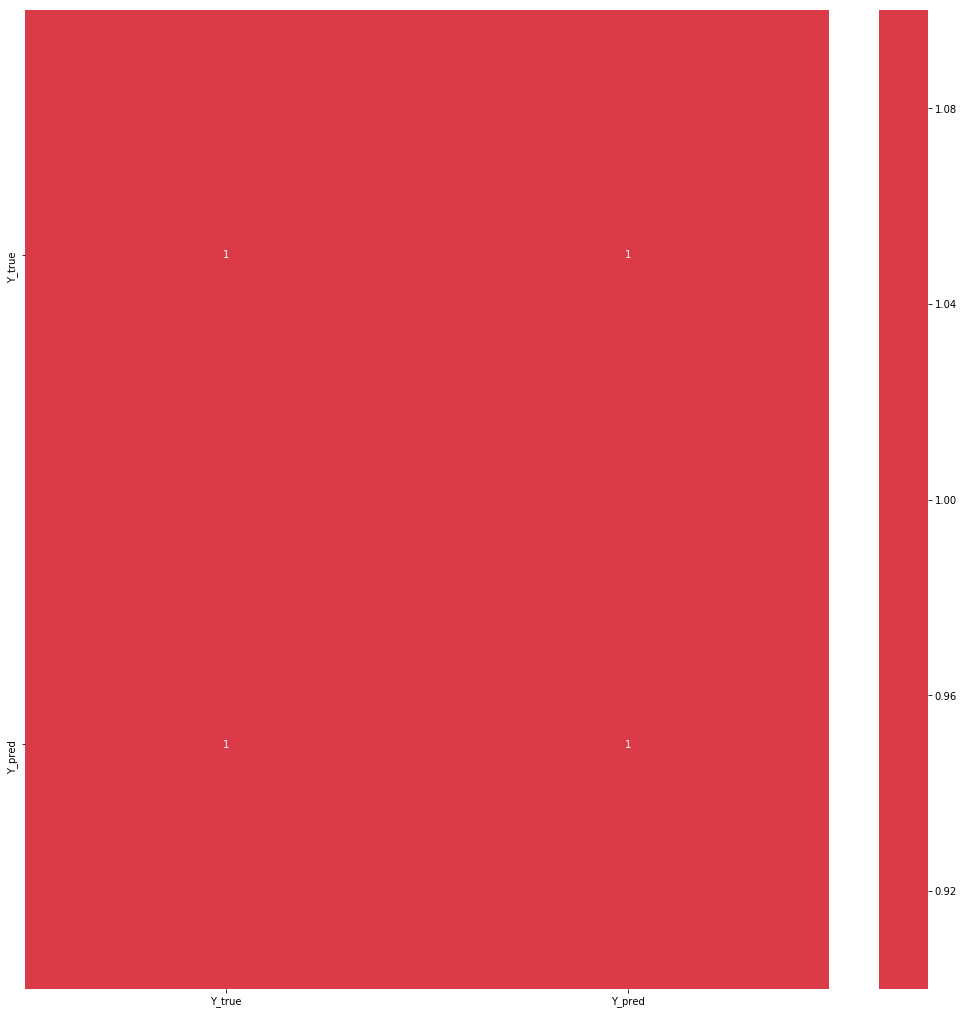

In [97]:
cor_matrix = df_rest.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()